 # ***Disney Plus Content Analysis***

#                                 By Shri Krishna

In this project, we are going to analyse content of one of the top OTT platform 'Disney Plus'(From October 2019 till September 2021) using Python language on Jupyter Notebook.

First we will retrieve dataset in csv format from Kaggle. Now we will analyse the dataset using python analysis techniques and libraries(Pandas,Matplotlib,Seaborn,etc.)

# About Disney Plus:

Disney+ is an American subscription video on-demand over-the-top streaming service owned and operated by the Media and Entertainment Distribution division of The Walt Disney Company.The service primarily distributes films and television series produced by The Walt Disney Studios and Walt Disney Television, with dedicated content hubs for the brands Disney, Pixar, Marvel, Star Wars, and National Geographic, as well as Star in some regions.


In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Importing Dataset

In [3]:
data=pd.read_csv('Disney_plus.csv')

In [4]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,imdb_rating
0,s634,Movie,10 Things I Hate About You,Gil Junger,"Heath Ledger, Julia Stiles, Joseph Gordon-Levi...",United States,"November 12, 2019",1999,PG-13,98 min,"Comedy, Coming of Age, Romance","Cameron falls for the girl of his dreams, but ...",7.6
1,s537,TV Show,101 Dalmatian Street,NaN,"Josh Brener, Michaela Dietz, Ella Kenion, Rhas...","United Kingdom, United States, Canada","February 28, 2020",2018,TV-Y7,1 Season,"Action-Adventure, Animation, Comedy",Pups Dolly and Dylan adventure to find their s...,6.5
2,s635,Movie,101 Dalmatians,"Wolfgang Reitherman, Hamilton Luske, Clyde Ger...","Rod Taylor, J. Pat O'Malley, Betty Gerson, Cat...",United States,"November 12, 2019",1961,G,81 min,"Action-Adventure, Animation, Family",Cruella De Vil dognaps all of the Dalmatian pu...,6.0
3,s418,TV Show,101 Dalmatians (Series),NaN,"Jeff Bennett, Christine Cavanaugh, Tara Charen...",NaN,"June 19, 2020",1997,TV-Y7,1 Season,"Action-Adventure, Animation, Kids",The Dearly Family move to a new farm home in t...,7.8
4,s636,Movie,101 Dalmatians II: Patch's London Adventure,"Jim Kammerud, Brian Smith","Barry Bostwick, Jason Alexander, Martin Short,...",United States,"November 12, 2019",2003,G,77 min,"Action-Adventure, Animation",Pongo and Perdita's pup Patch gets the chance ...,6.2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       1368 non-null   object 
 1   type          1368 non-null   object 
 2   title         1368 non-null   object 
 3   director      928 non-null    object 
 4   cast          1194 non-null   object 
 5   country       1193 non-null   object 
 6   date_added    1365 non-null   object 
 7   release_year  1368 non-null   int64  
 8   rating        1366 non-null   object 
 9   duration      1368 non-null   object 
 10  listed_in     1368 non-null   object 
 11  description   1368 non-null   object 
 12  imdb_rating   1368 non-null   float64
dtypes: float64(1), int64(1), object(11)
memory usage: 139.1+ KB


In [6]:
data.describe()

,release_year,imdb_rating
count,1368.000000,1368.000000
mean,2002.348684,6.655702
std,22.127559,1.016238
min,1928.000000,2.300000
25%,1998.000000,6.100000
50%,2011.000000,6.800000
75%,2018.000000,7.400000
max,2021.000000,9.100000


*Check for unique values*

In [7]:
data.nunique()

show_id         1368
type               2
title           1368
director         578
cast            1132
country           87
date_added       150
release_year      90
rating             7
duration         156
listed_in        317
description     1366
imdb_rating       58
dtype: int64

# Check for duplicate values

In [8]:
data.duplicated().sum()

0

# Exploratory Data Analysis

**Missing values**

<AxesSubplot:>

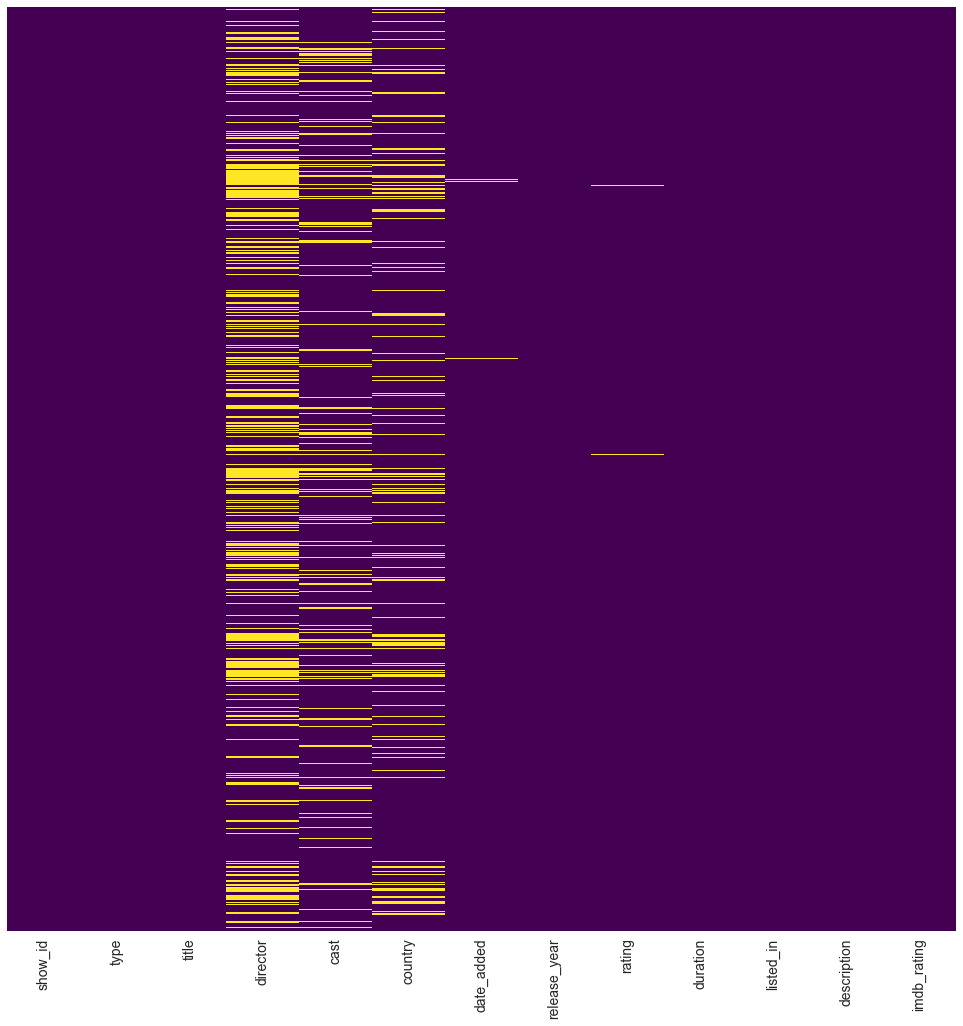

In [9]:
plt.figure(figsize=(17,17))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
data.isnull().sum()

show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
imdb_rating       0
dtype: int64

In [11]:
df=data.copy()

In [12]:
df1= df.drop(['director', 'cast', 'country'], axis=1)

In [13]:
df2=df1.dropna()
df2.shape

(1363, 10)

<AxesSubplot:>

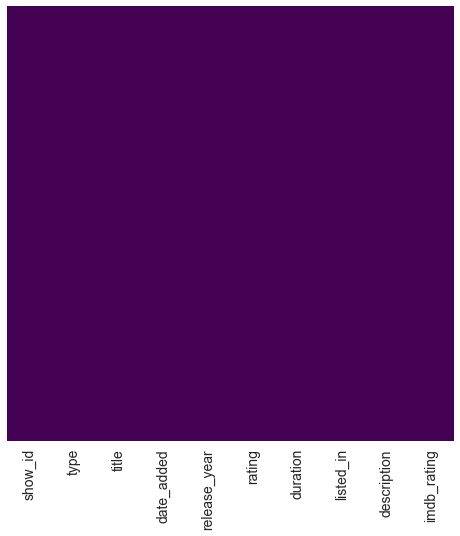

In [14]:
plt.figure(figsize=(8,8))
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
import sys

if not sys.warnoptions:
    # Importing warnings library to handle warnings
    import warnings
    warnings.simplefilter("ignore")
    
df2['date_added'] = pd.to_datetime(df2['date_added'])
df2['day_added'] = df2['date_added'].dt.day
df2['year_added'] = df2['date_added'].dt.year
df2['month_added']=df2['date_added'].dt.month
df2['year_added'].astype(int);
df2['day_added'].astype(int);

In [16]:
import sys

if not sys.warnoptions:
    # Importing warnings library to handle warnings
    import warnings
    warnings.simplefilter("ignore")
    
df2[['Main_theme','Theme2','Theme3']] = df2.listed_in.apply(
   lambda x: pd.Series(str(x).split(",")))

In [17]:
df2.head(10)

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description,imdb_rating,day_added,year_added,month_added,Main_theme,Theme2,Theme3
0,s634,Movie,10 Things I Hate About You,2019-11-12,1999,PG-13,98 min,"Comedy, Coming of Age, Romance","Cameron falls for the girl of his dreams, but ...",7.6,12,2019,11,Comedy,Coming of Age,Romance
1,s537,TV Show,101 Dalmatian Street,2020-02-28,2018,TV-Y7,1 Season,"Action-Adventure, Animation, Comedy",Pups Dolly and Dylan adventure to find their s...,6.5,28,2020,2,Action-Adventure,Animation,Comedy
2,s635,Movie,101 Dalmatians,2019-11-12,1961,G,81 min,"Action-Adventure, Animation, Family",Cruella De Vil dognaps all of the Dalmatian pu...,6.0,12,2019,11,Action-Adventure,Animation,Family
3,s418,TV Show,101 Dalmatians (Series),2020-06-19,1997,TV-Y7,1 Season,"Action-Adventure, Animation, Kids",The Dearly Family move to a new farm home in t...,7.8,19,2020,6,Action-Adventure,Animation,Kids
4,s636,Movie,101 Dalmatians II: Patch's London Adventure,2019-11-12,2003,G,77 min,"Action-Adventure, Animation",Pongo and Perdita's pup Patch gets the chance ...,6.2,12,2019,11,Action-Adventure,Animation,NaN
5,s637,Movie,102 Dalmatians,2019-11-12,2000,G,104 min,"Action-Adventure, Animals & Nature, Family","Oddball, the spotless Dalmatian puppy, heads o...",6.5,12,2019,11,Action-Adventure,Animals & Nature,Family
6,s638,Movie,12 Dates of Christmas,2019-11-12,2011,PG,88 min,"Comedy, Family, Fantasy","Setup on a Christmas Eve date, a woman must re...",5.6,12,2019,11,Comedy,Family,Fantasy
7,s639,Movie,"20,000 Leagues Under the Sea",2019-11-12,1954,G,127 min,"Action-Adventure, Family, Science Fiction",Climb aboard the Nautilus and into an undersea...,7.1,12,2019,11,Action-Adventure,Family,Science Fiction
8,s152,Movie,22 vs. Earth,2021-04-30,2021,PG,9 min,"Animation, Comedy, Family","22 refuses to go to Earth, enlisting a gang of...",5.6,30,2021,4,Animation,Comedy,Family
9,s238,Movie,700 Sharks,2021-01-01,2018,PG,45 min,"Animals & Nature, Documentary",Follow an international team of scientists in ...,8.1,1,2021,1,Animals & Nature,Documentary,NaN


# Basic Insights from data

**Q1:What is the earliest release_year?**

In [18]:
data['release_year'].min()

1928

**Q2:What is the earliest date when a movie/tv show was added to Disney+?**

In [19]:
df2['date_added'].min()

Timestamp('2019-10-01 00:00:00')

**Q3: What is the movie/tv show with highest imdb_rating and what is its rating?**

In [20]:
print(df2[['title','type','rating','imdb_rating']][df2.imdb_rating == df2.imdb_rating.max()])

                                              title   type rating  imdb_rating
999  Star Wars: The Empire Strikes Back (Episode V)  Movie     PG          9.1


**Q4: What is the movie/tv show with lowest imdb_rating and what is its rating?**

In [21]:
print(df2[['title','type','rating','imdb_rating']][df2.imdb_rating == df2.imdb_rating.min()])

                                       title   type rating  imdb_rating
823   Petra: Secrets of the Ancient Builders  Movie      G          2.3
1038      The Adventures of André & Wally B.  Movie      G          2.3


_______________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

# Visualization

<AxesSubplot:xlabel='rating', ylabel='count'>

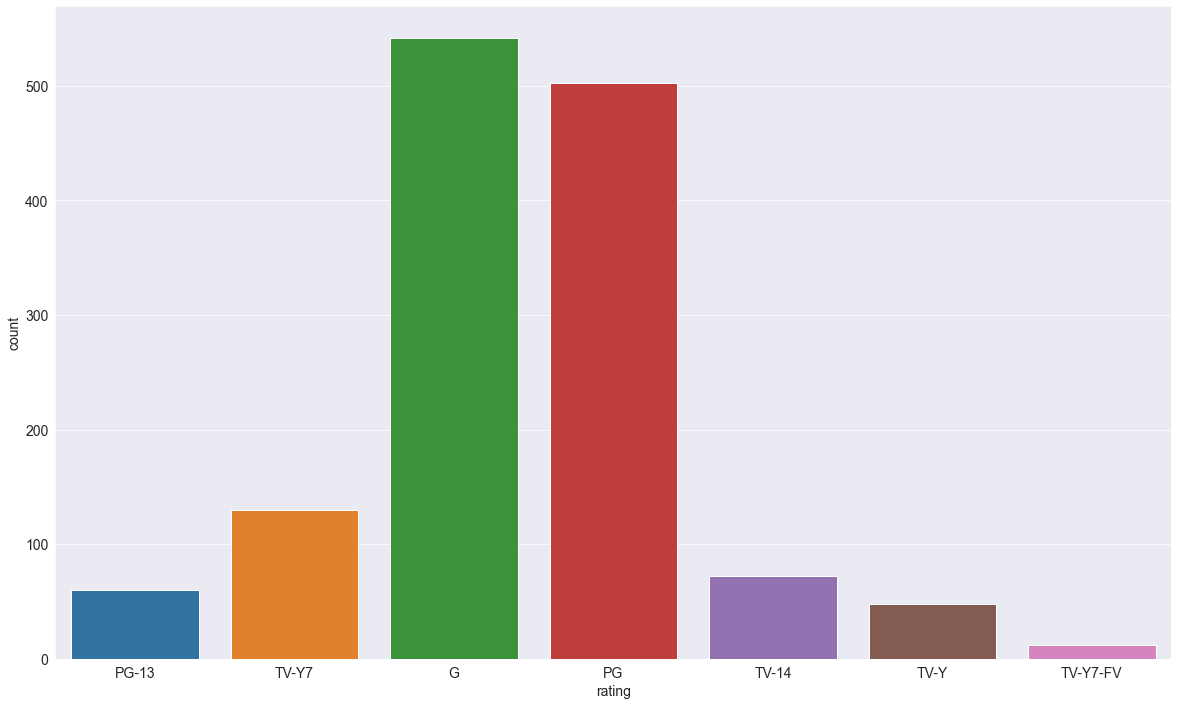

In [22]:
plt.figure(figsize=(20,12))
sns.countplot(x='rating', data=data)

**<--------------------------------------------  Rating wise content distribution ------------------------------------------->**

_______________________________________________________________________________________________________________________________        

<AxesSubplot:xlabel='type', ylabel='count'>

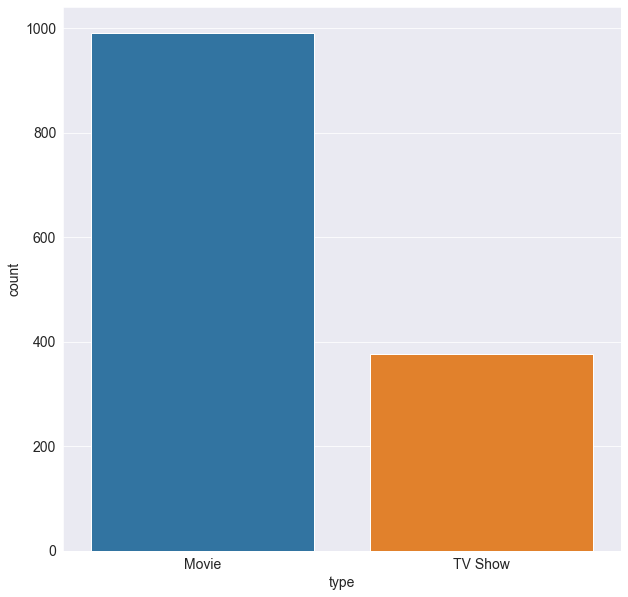

In [23]:
plt.figure(figsize=(10,10))
sns.countplot(x='type', data=data)

**<---------------------- Visualizing on basis of content type --------------------------->**

_________________________________________________________________________________________________________________________

<AxesSubplot:xlabel='type', ylabel='count'>

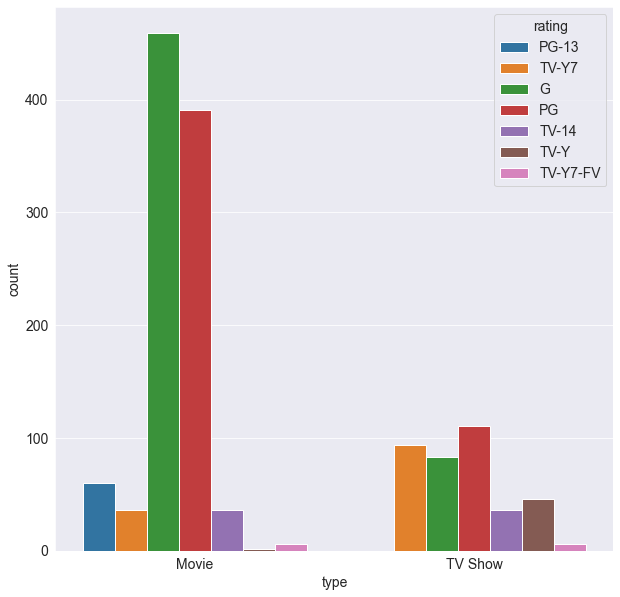

In [24]:
plt.figure(figsize=(10,10))
sns.countplot(x='type',hue='rating', data=data)

**<-------------- Chart showing content type with relation to its rating ------------------->**

____________________________________________________________________________________________________________________________________________________________________________

<AxesSubplot:xlabel='rating', ylabel='count'>

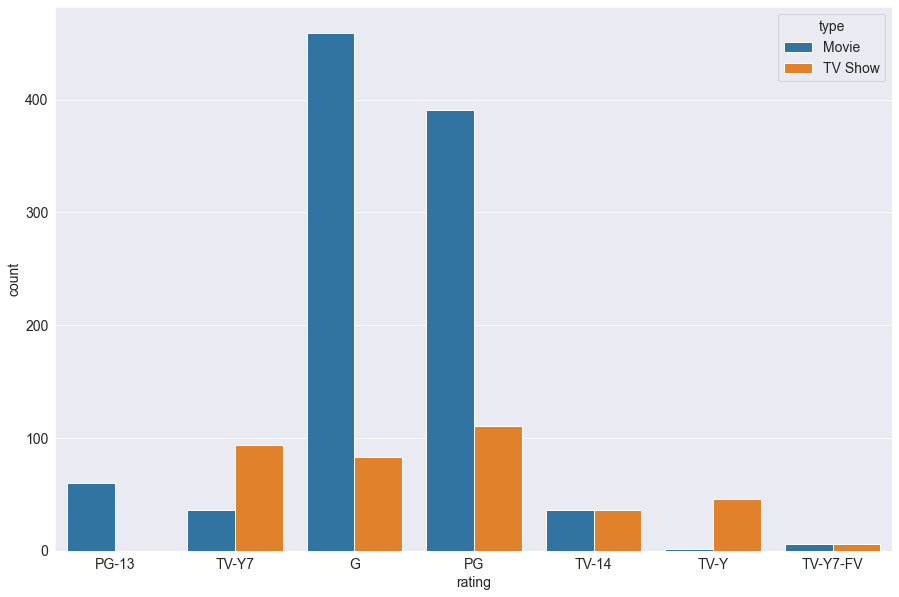

In [25]:
plt.figure(figsize=(15,10))
sns.countplot(x='rating',hue='type', data=data)

        <----------------------------Rating of content with respect to its type---------------------------->

  ___________________________________________________________________________________________________________________________________________________________________________

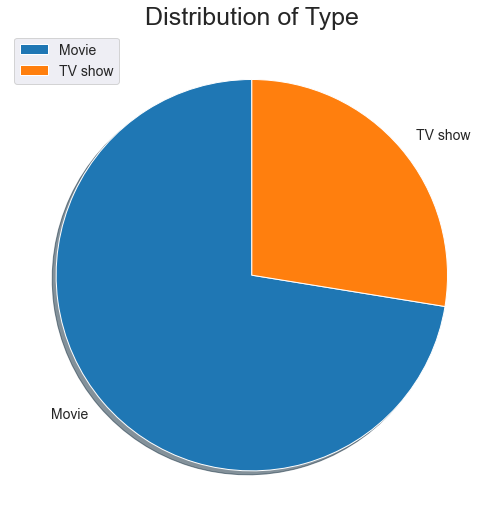

In [26]:
labels = ['Movie', 'TV show']
size = data['type'].value_counts()
#colors = plt.cm.Wist
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size,labels=labels,shadow = True, startangle = 90)
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

**Pie chart showing share of the Type: Movie and TV shows**

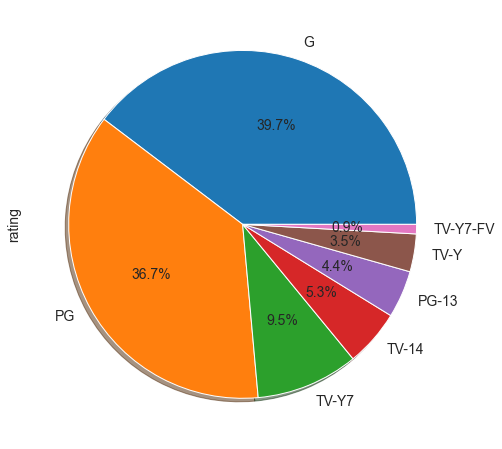

In [27]:
data['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

*Pie chart showing share of different ratings in total content*

____________________________________________________________________________________________________________________________________________________________________________

<AxesSubplot:xlabel='month_added', ylabel='count'>

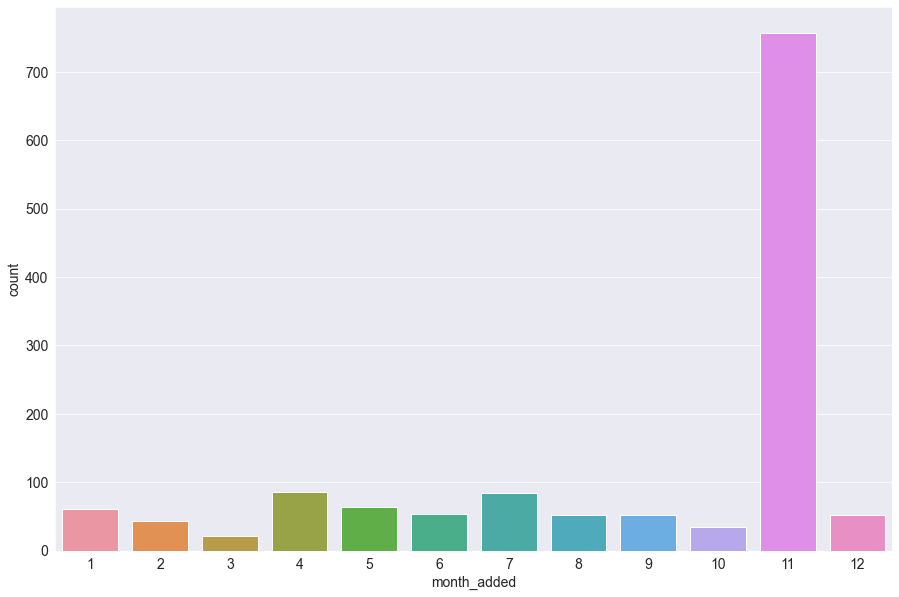

In [28]:
plt.figure(figsize=(15,10))
sns.countplot(x='month_added', data=df2)

                        <--------------------Monthwise content addition----------------------->

____________________________________________________________________________________________________________________________________________________________________________  

<AxesSubplot:xlabel='month_added', ylabel='count'>

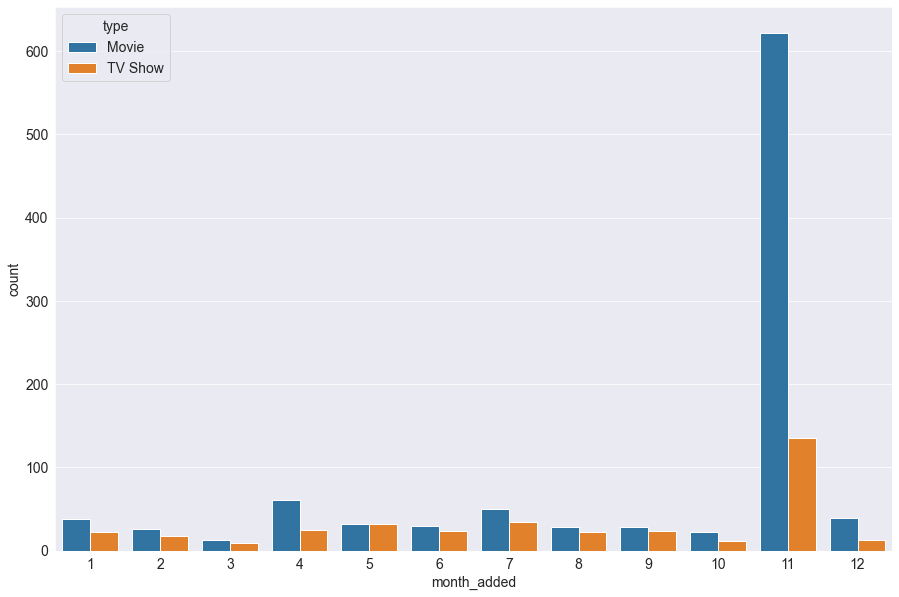

In [29]:
plt.figure(figsize=(15,10))
sns.countplot(x='month_added',hue='type', data=df2)

**Bar Chart showing relation between content type and month_added**

<AxesSubplot:xlabel='month_added', ylabel='count'>

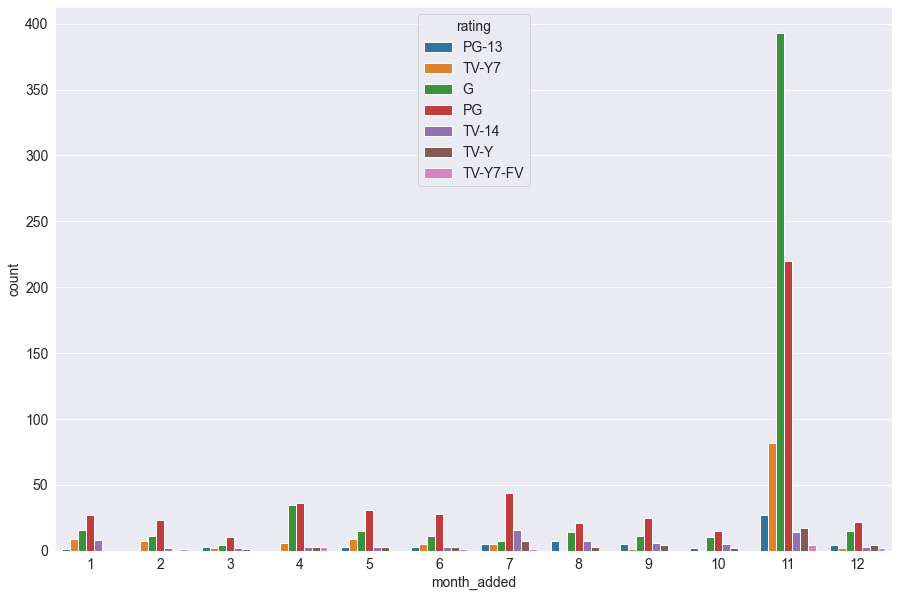

In [30]:
plt.figure(figsize=(15,10))
sns.countplot(x='month_added',hue='rating', data=df2)

**Bar Chart showing relation between content rating and month_added**

____________________________________________________________________________________________________________________________________________________________________________   

<AxesSubplot:xlabel='month_added', ylabel='imdb_rating'>

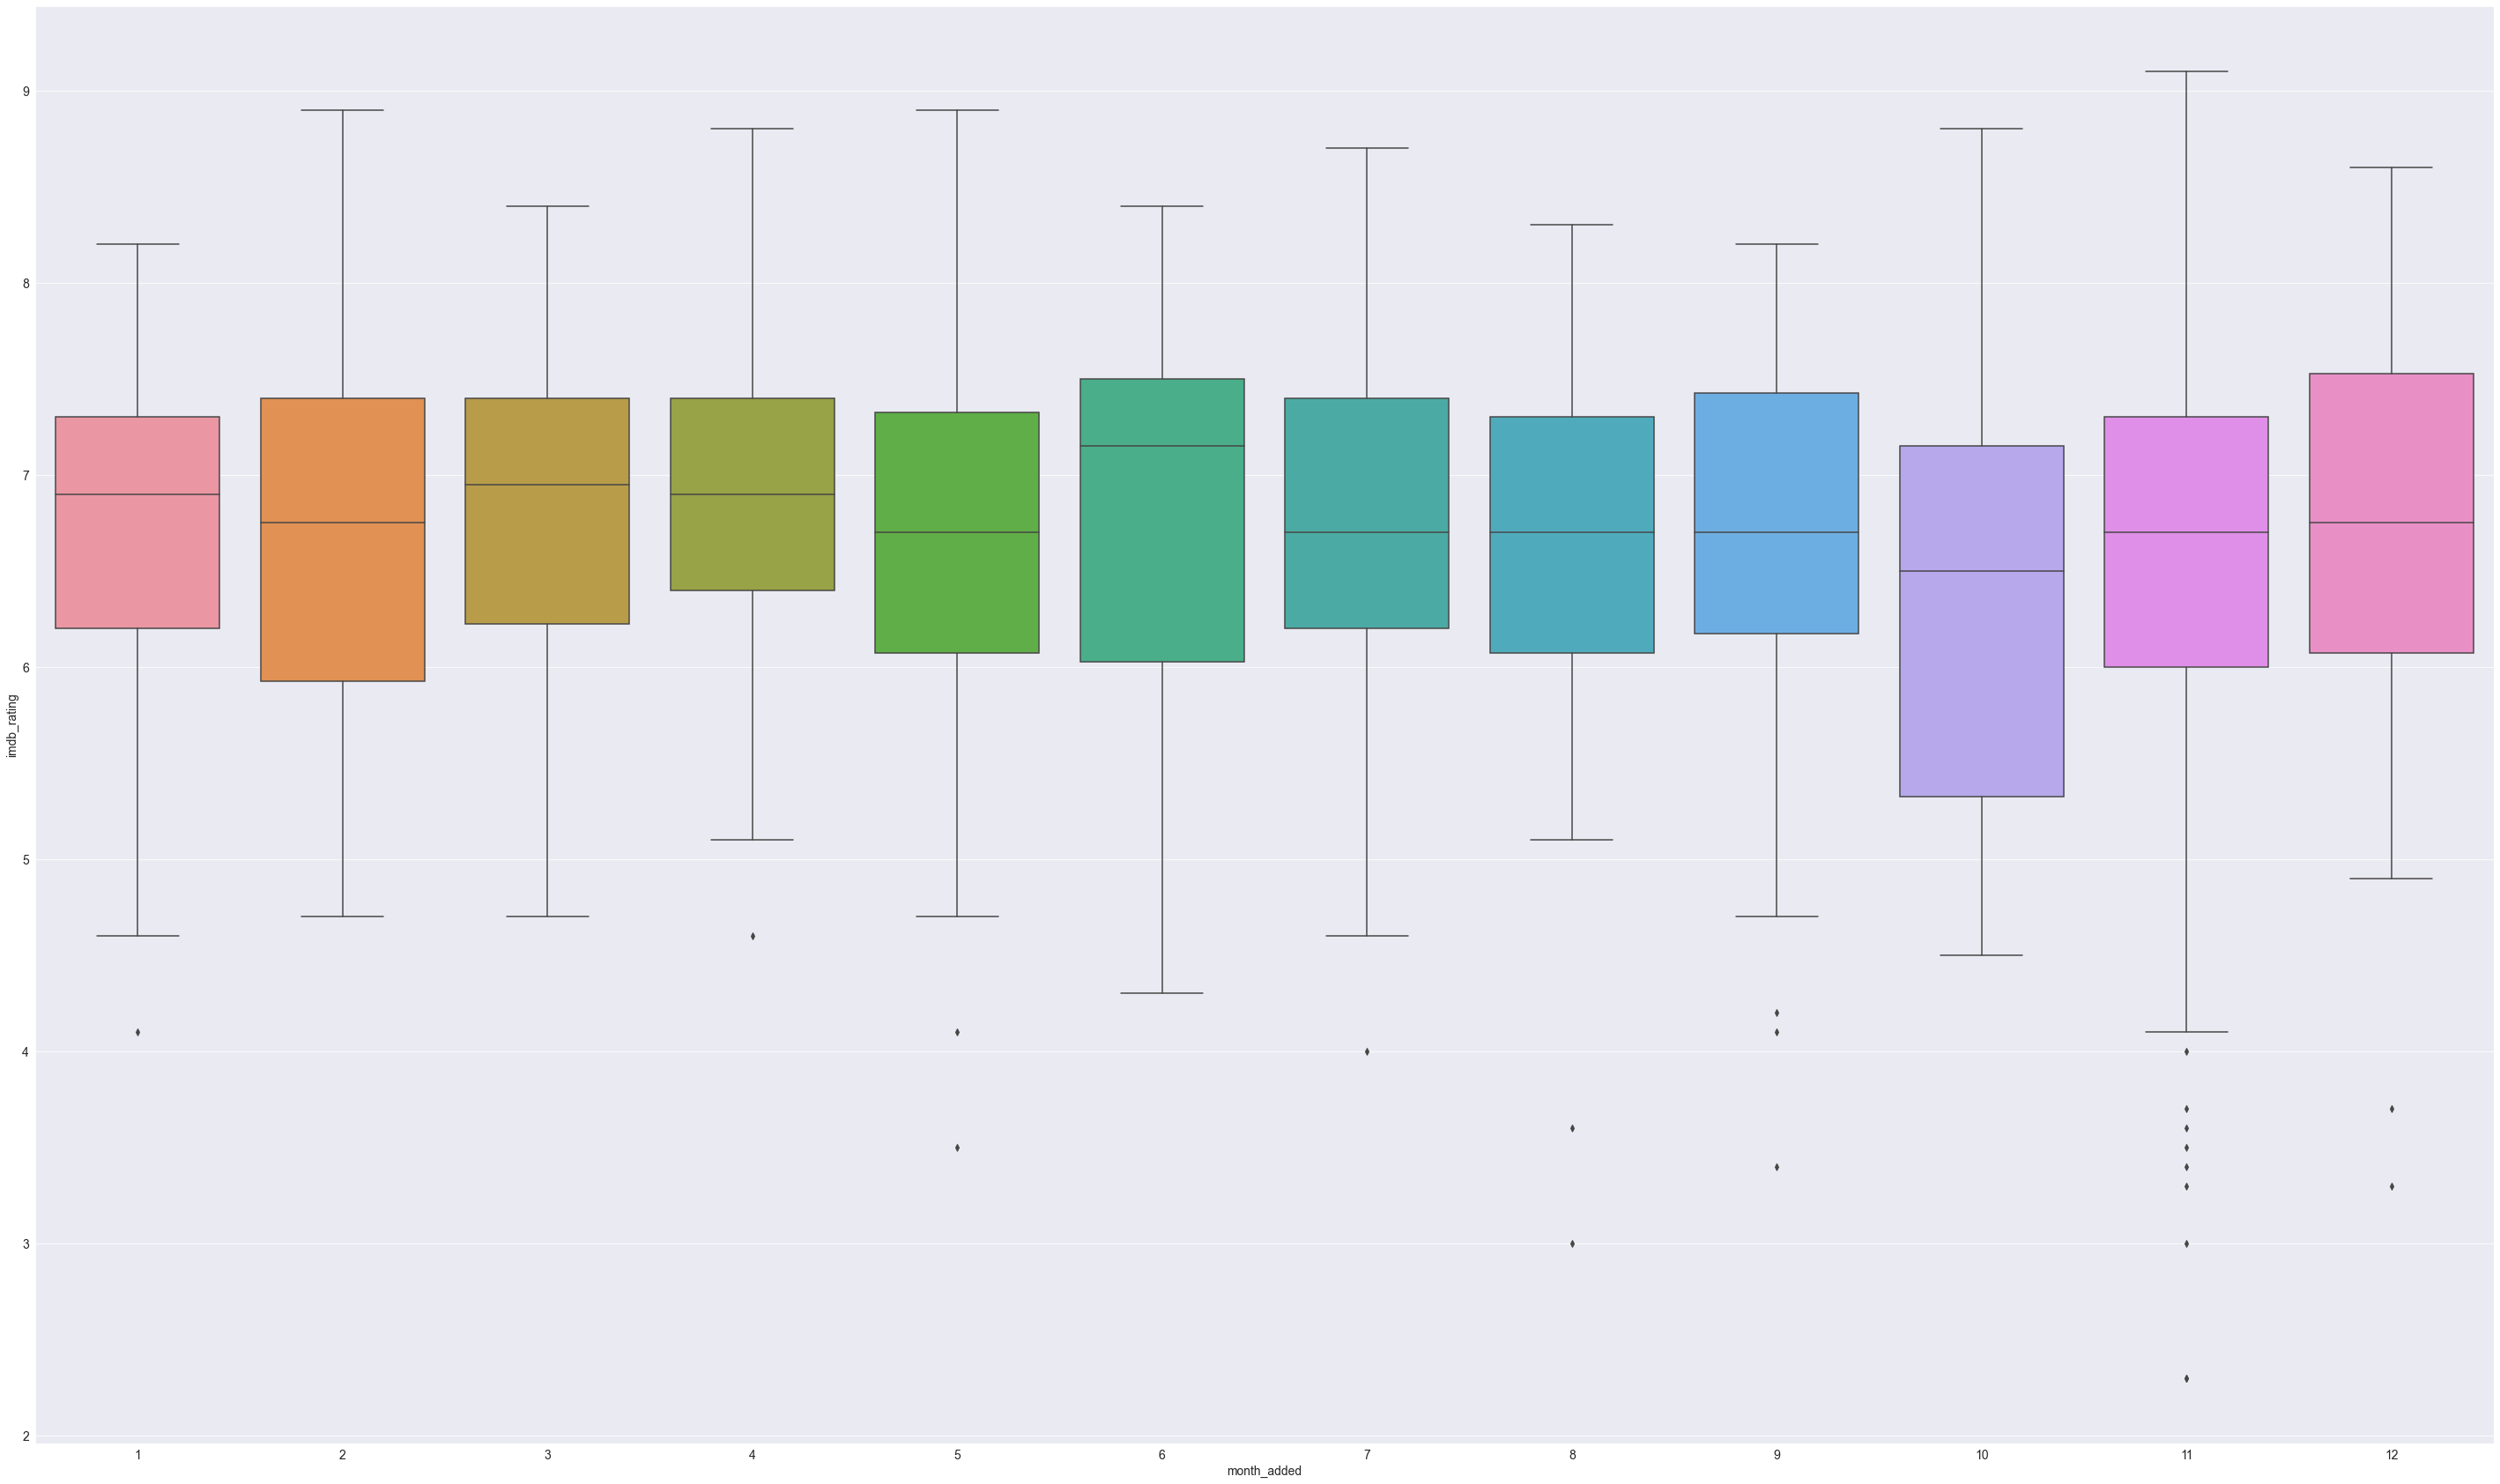

In [31]:
plt.figure(figsize=(50,30))
sns.boxplot(x='month_added',y='imdb_rating', data=df2)

**Box-plot showing relation between imdb_rating and the month_added**

____________________________________________________________________________________________________________________________________________________________________________          

<AxesSubplot:xlabel='day_added', ylabel='count'>

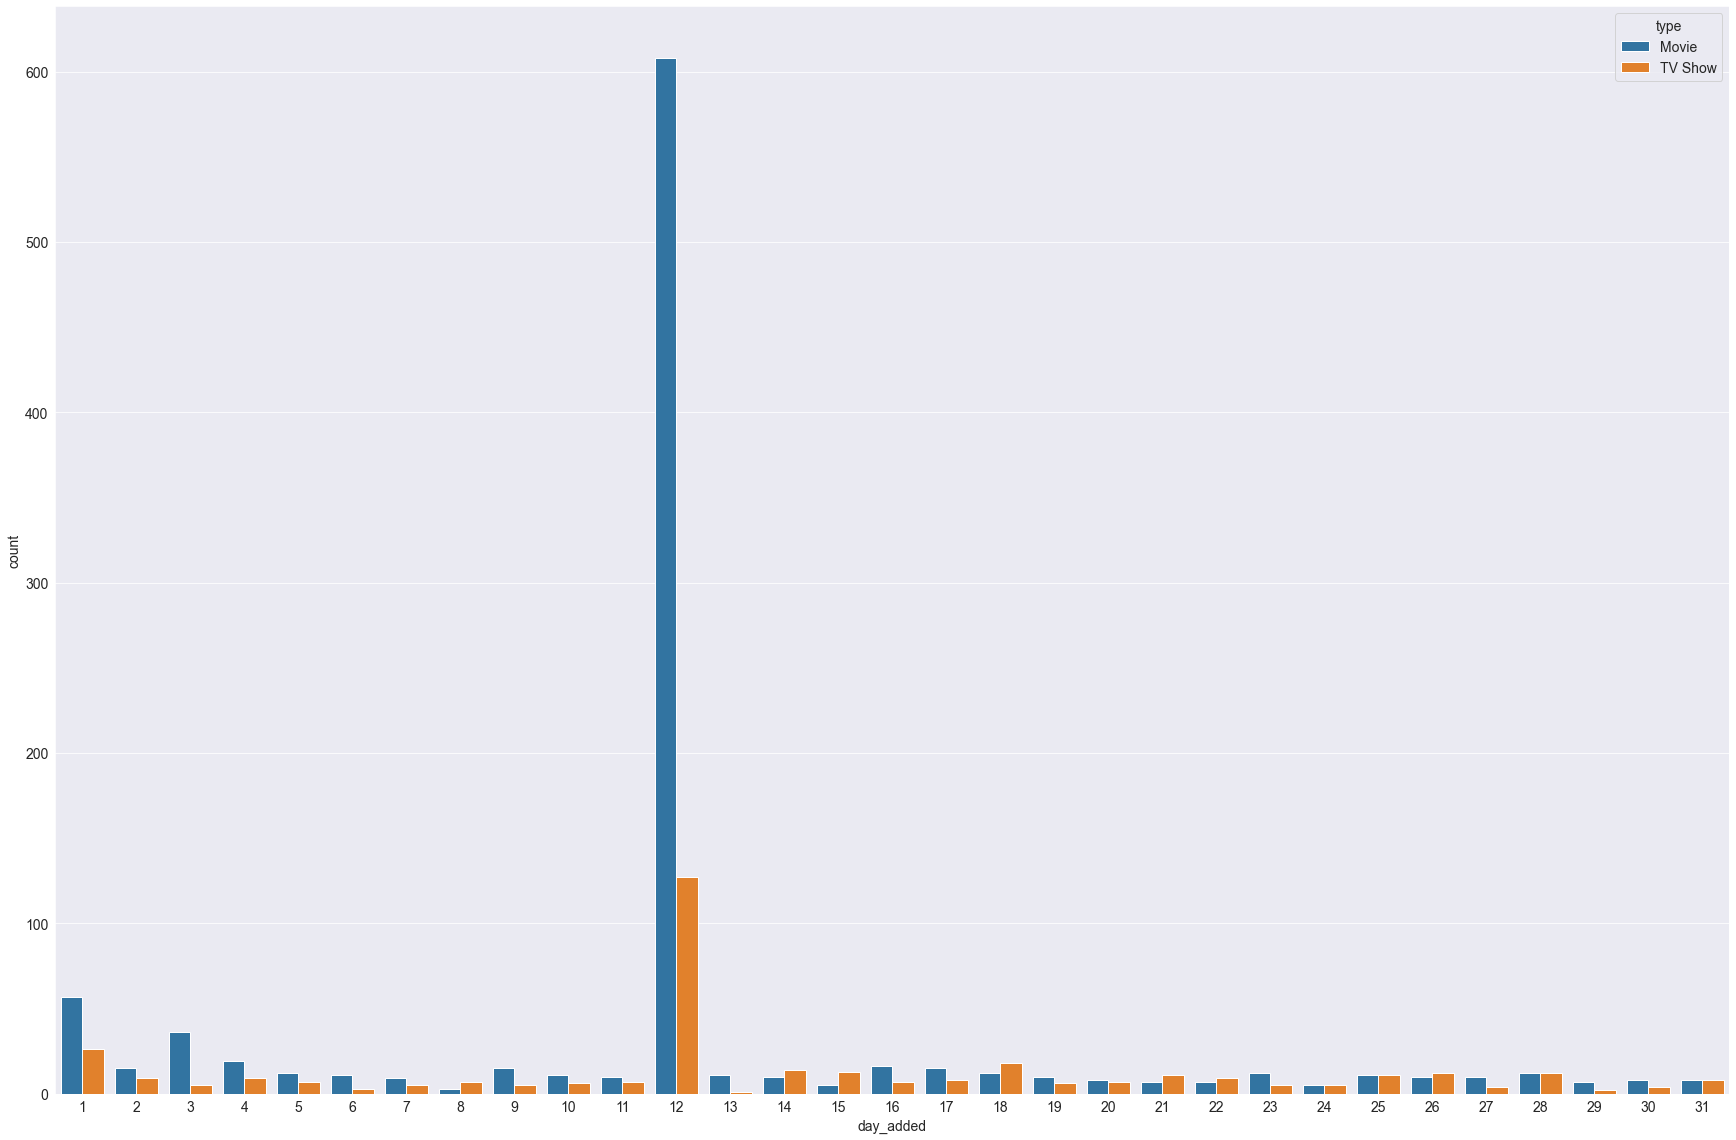

In [32]:
plt.figure(figsize=(30,20))
sns.countplot(x='day_added',hue='type', data=df2)

**Chart showing content added per day with relation to the types: Movies and TV shows**

____________________________________________________________________________________________________________________________________________________________________________     

[Text(0, 0, '1928'),
 Text(1, 0, '1932'),
 Text(2, 0, '1933'),
 Text(3, 0, '1934'),
 Text(4, 0, '1935'),
 Text(5, 0, '1936'),
 Text(6, 0, '1937'),
 Text(7, 0, '1938'),
 Text(8, 0, '1939'),
 Text(9, 0, '1940'),
 Text(10, 0, '1941'),
 Text(11, 0, '1942'),
 Text(12, 0, '1943'),
 Text(13, 0, '1944'),
 Text(14, 0, '1945'),
 Text(15, 0, '1946'),
 Text(16, 0, '1947'),
 Text(17, 0, '1948'),
 Text(18, 0, '1949'),
 Text(19, 0, '1950'),
 Text(20, 0, '1951'),
 Text(21, 0, '1952'),
 Text(22, 0, '1953'),
 Text(23, 0, '1954'),
 Text(24, 0, '1955'),
 Text(25, 0, '1956'),
 Text(26, 0, '1957'),
 Text(27, 0, '1959'),
 Text(28, 0, '1960'),
 Text(29, 0, '1961'),
 Text(30, 0, '1962'),
 Text(31, 0, '1963'),
 Text(32, 0, '1964'),
 Text(33, 0, '1965'),
 Text(34, 0, '1966'),
 Text(35, 0, '1967'),
 Text(36, 0, '1968'),
 Text(37, 0, '1969'),
 Text(38, 0, '1970'),
 Text(39, 0, '1971'),
 Text(40, 0, '1972'),
 Text(41, 0, '1973'),
 Text(42, 0, '1974'),
 Text(43, 0, '1975'),
 Text(44, 0, '1976'),
 Text(45, 0, '1977')

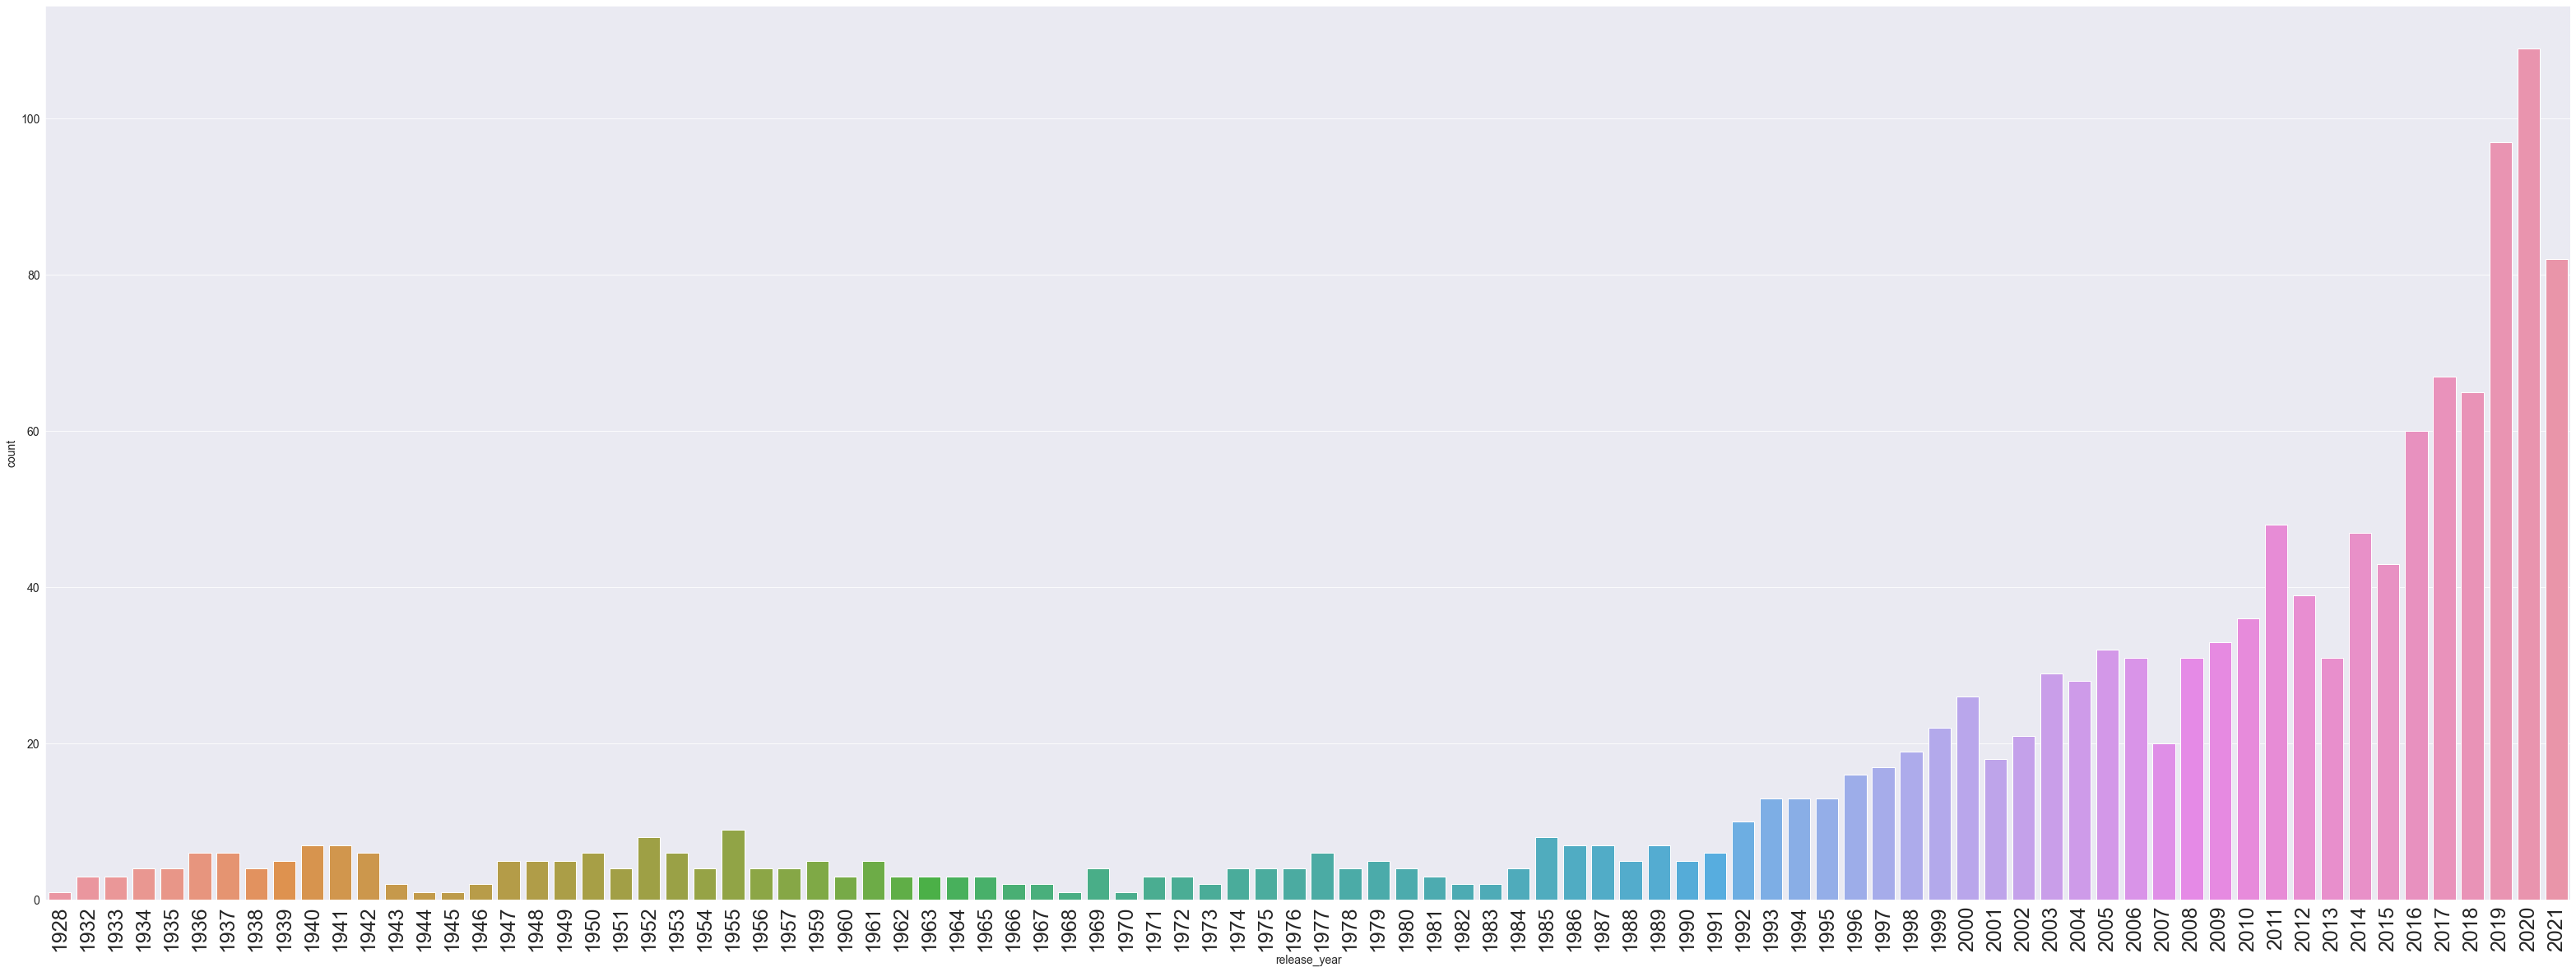

In [33]:
plt.figure(figsize=(55,20))
chart=sns.countplot(x='release_year', data=data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90,fontsize=25)


**Content released per year shown using Bar chart**

_______________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________          

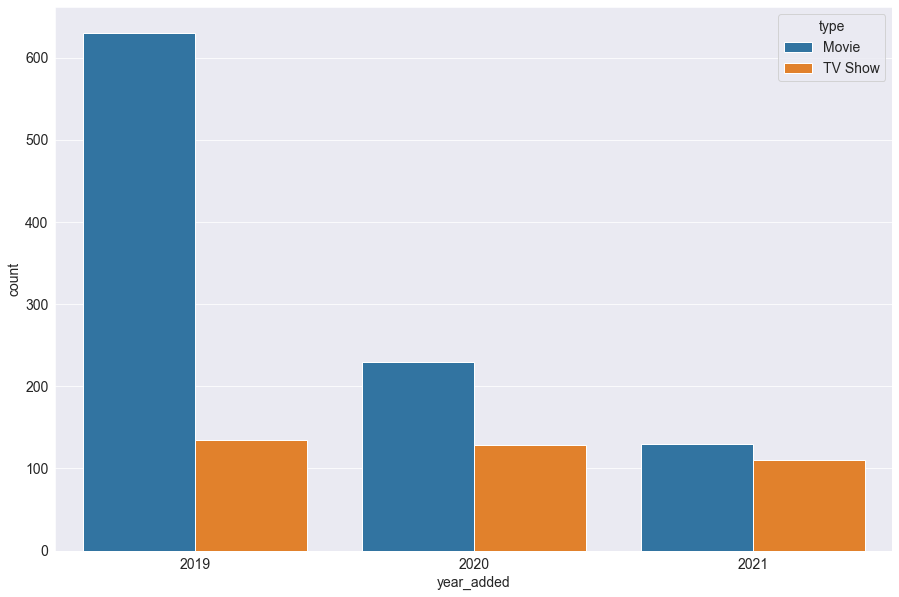

In [34]:
plt.figure(figsize=(15,10))
chart=sns.countplot(x='year_added',hue='type', data=df2)

**<---------------------------- Chart showing content added in disney plus by type per year ------------------------------>**

 __________________________________________________________________________________________________________________________________________________________________________

[Text(0, 0, 'Comedy'),
 Text(1, 0, 'Action-Adventure'),
 Text(2, 0, 'Animation'),
 Text(3, 0, 'Animals & Nature'),
 Text(4, 0, 'Concert Film'),
 Text(5, 0, 'Documentary'),
 Text(6, 0, 'Coming of Age'),
 Text(7, 0, 'Fantasy'),
 Text(8, 0, 'Drama'),
 Text(9, 0, 'Reality'),
 Text(10, 0, 'Docuseries'),
 Text(11, 0, 'Family'),
 Text(12, 0, 'Anthology'),
 Text(13, 0, 'Biographical'),
 Text(14, 0, 'Buddy'),
 Text(15, 0, 'Dance'),
 Text(16, 0, 'Sports'),
 Text(17, 0, 'Crime'),
 Text(18, 0, 'Game Show / Competition'),
 Text(19, 0, 'Series'),
 Text(20, 0, 'Movies'),
 Text(21, 0, 'Music'),
 Text(22, 0, 'Historical'),
 Text(23, 0, 'Musical'),
 Text(24, 0, 'Kids'),
 Text(25, 0, 'Variety'),
 Text(26, 0, 'Science Fiction'),
 Text(27, 0, 'Talk Show')]

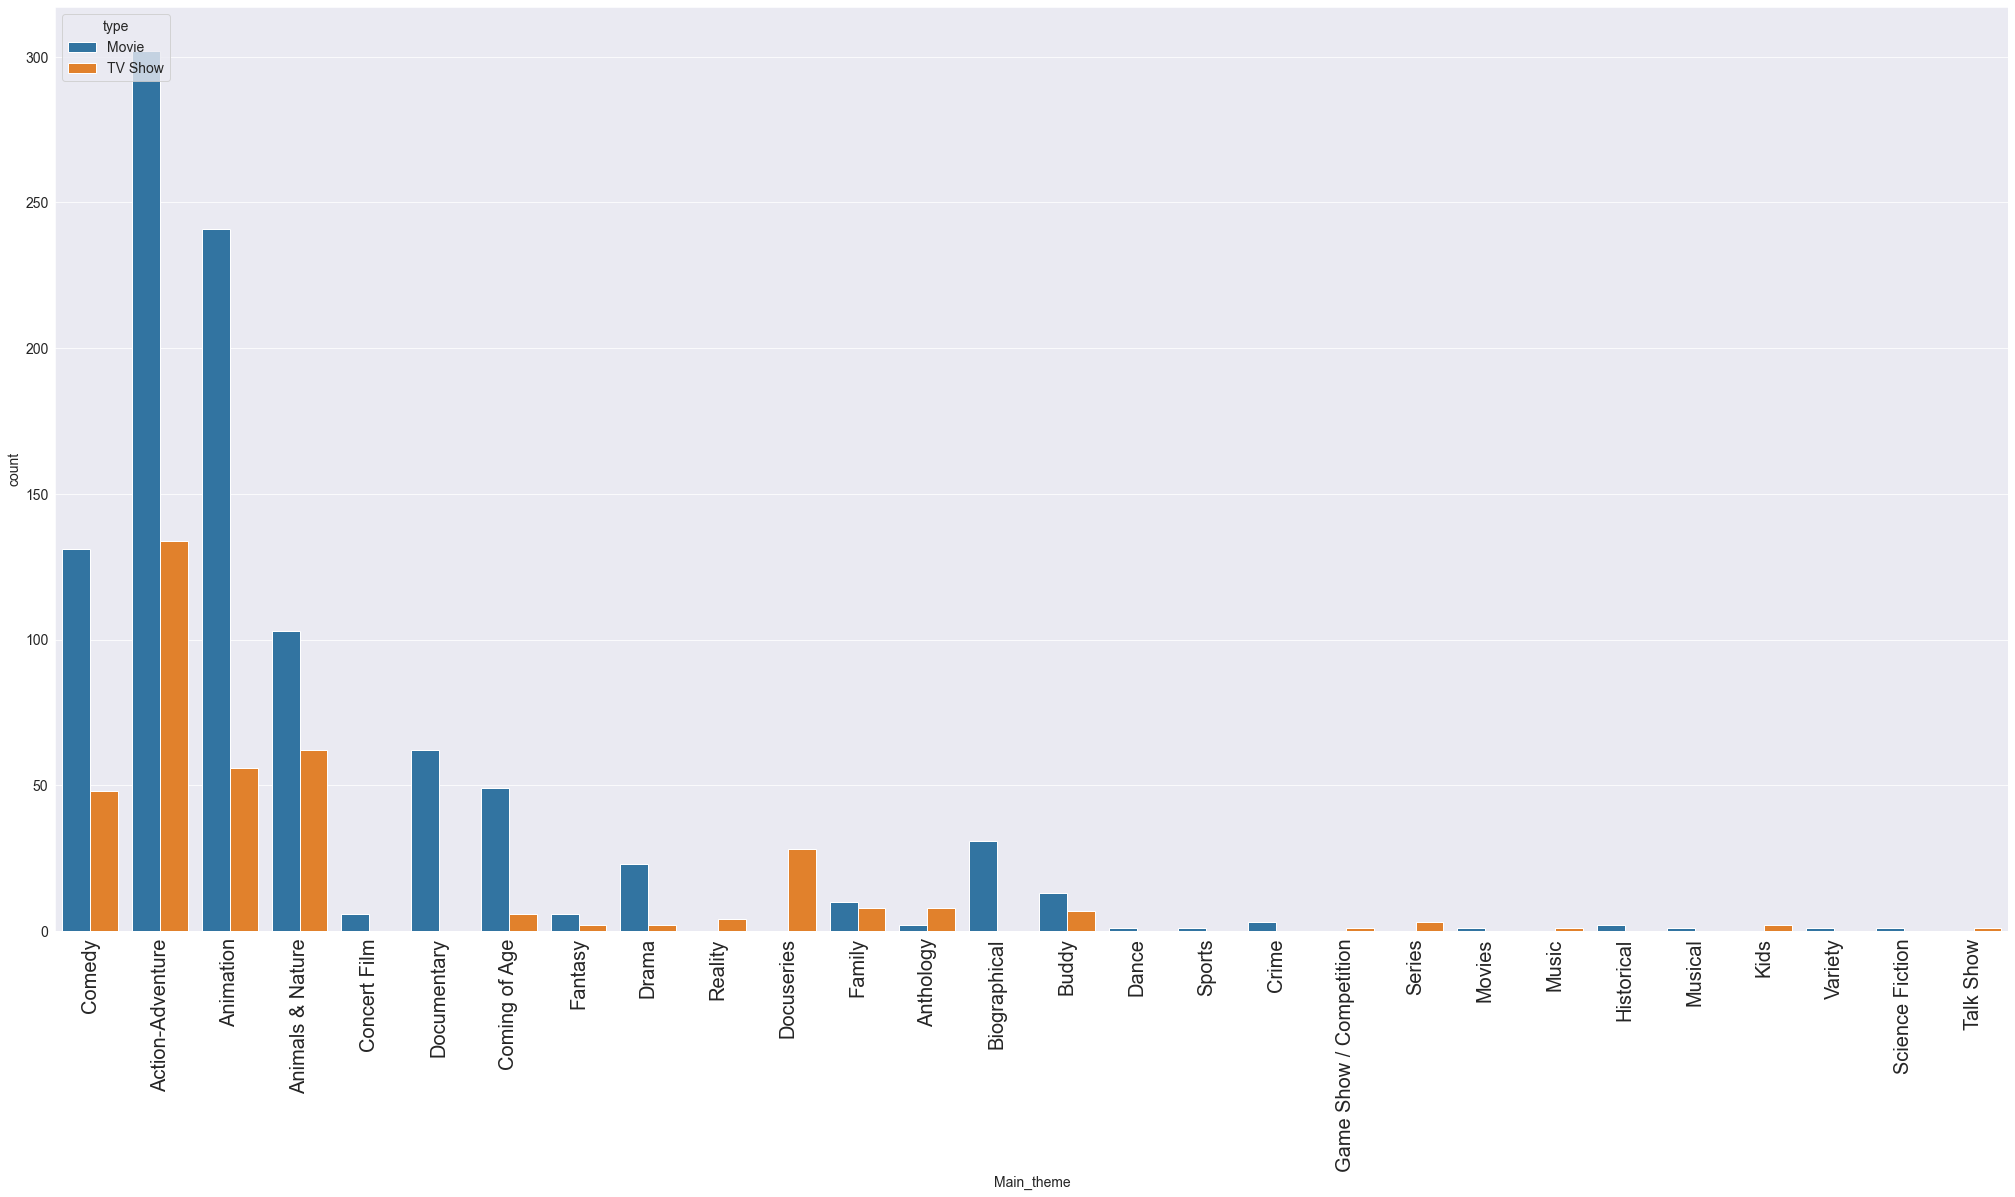

In [35]:
plt.figure(figsize=(35,17))
chart=sns.countplot(hue='type',x='Main_theme', data=df2)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90,fontsize=20)

**Relation between Main_theme and type of content**

   ________________________________________________________________________________________________________________________________

[Text(0, 0, ' Coming of Age'),
 Text(1, 0, ' Animation'),
 Text(2, 0, ' Animals & Nature'),
 Text(3, 0, ' Family'),
 Text(4, 0, ' Comedy'),
 Text(5, 0, ' Documentary'),
 Text(6, 0, ' Music'),
 Text(7, 0, ' Drama'),
 Text(8, 0, ' Musical'),
 Text(9, 0, ' Docuseries'),
 Text(10, 0, ' Fantasy'),
 Text(11, 0, ' Historical'),
 Text(12, 0, ' Crime'),
 Text(13, 0, ' Science Fiction'),
 Text(14, 0, ' Game Show / Competition'),
 Text(15, 0, ' Anthology'),
 Text(16, 0, ' Kids'),
 Text(17, 0, ' Sports'),
 Text(18, 0, ' Buddy'),
 Text(19, 0, ' Romance'),
 Text(20, 0, ' Mystery'),
 Text(21, 0, ' Variety'),
 Text(22, 0, ' Lifestyle'),
 Text(23, 0, ' Parody'),
 Text(24, 0, ' Reality'),
 Text(25, 0, ' Dance'),
 Text(26, 0, ' Biographical'),
 Text(27, 0, ' Western'),
 Text(28, 0, ' Disaster')]

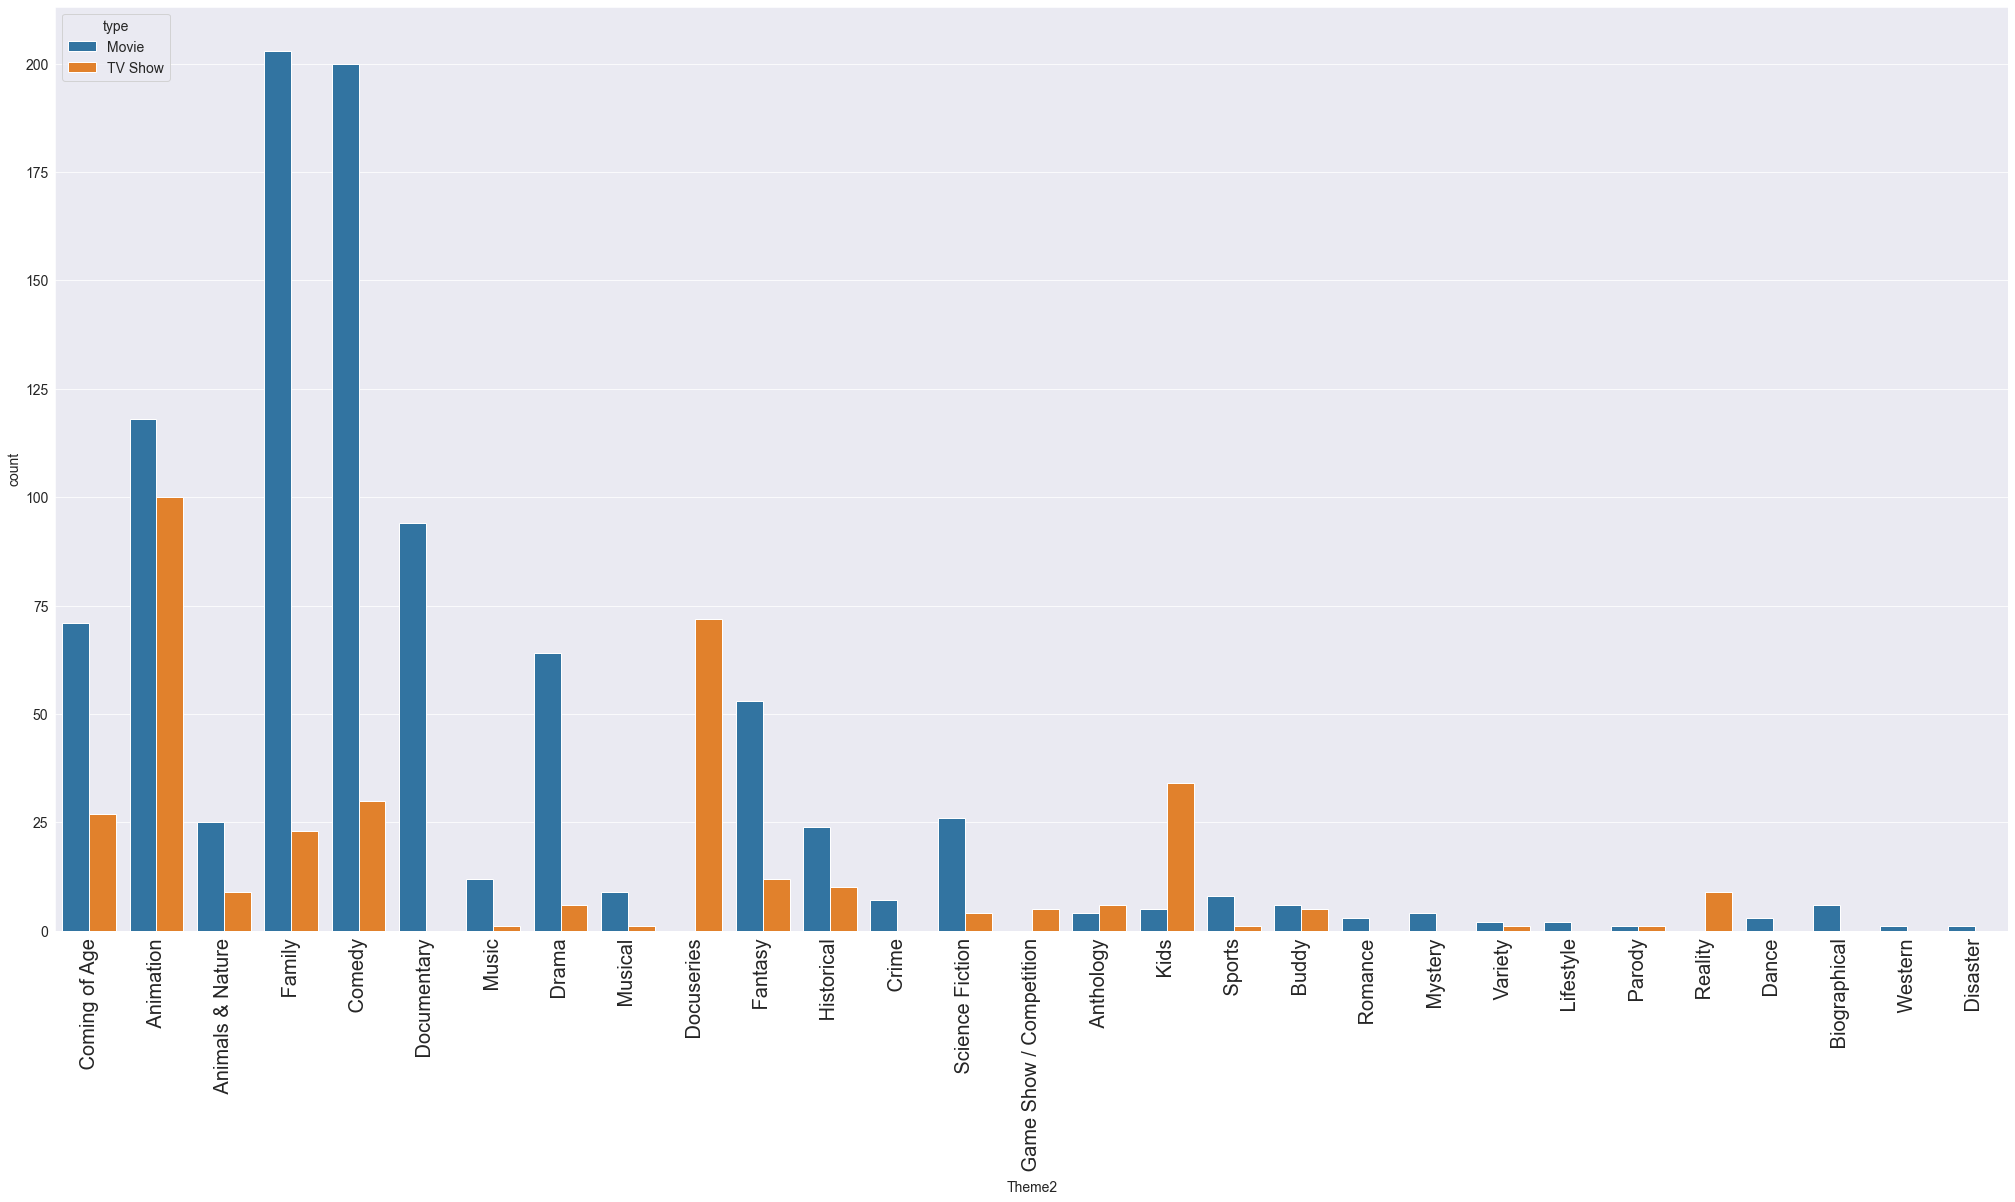

In [36]:
plt.figure(figsize=(35,17))
chart=sns.countplot(x='Theme2',hue='type', data=df2)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90,fontsize=20)

**Relation between Theme2 and type of content**

[Text(0, 0, ' Romance'),
 Text(1, 0, ' Comedy'),
 Text(2, 0, ' Family'),
 Text(3, 0, ' Kids'),
 Text(4, 0, ' Fantasy'),
 Text(5, 0, ' Science Fiction'),
 Text(6, 0, ' Musical'),
 Text(7, 0, ' Coming of Age'),
 Text(8, 0, ' Historical'),
 Text(9, 0, ' Documentary'),
 Text(10, 0, ' Sports'),
 Text(11, 0, ' Drama'),
 Text(12, 0, ' Crime'),
 Text(13, 0, ' Music'),
 Text(14, 0, ' Reality'),
 Text(15, 0, ' Game Show / Competition'),
 Text(16, 0, ' Animation'),
 Text(17, 0, ' Docuseries'),
 Text(18, 0, ' Mystery'),
 Text(19, 0, ' Disaster'),
 Text(20, 0, ' Police/Cop'),
 Text(21, 0, ' Romantic Comedy'),
 Text(22, 0, ' Western'),
 Text(23, 0, ' Variety'),
 Text(24, 0, ' Lifestyle'),
 Text(25, 0, ' Buddy'),
 Text(26, 0, ' Parody'),
 Text(27, 0, ' Anime'),
 Text(28, 0, ' Thriller'),
 Text(29, 0, ' Medical'),
 Text(30, 0, ' Survival'),
 Text(31, 0, ' Dance'),
 Text(32, 0, ' Anthology'),
 Text(33, 0, ' Superhero'),
 Text(34, 0, ' Spy/Espionage'),
 Text(35, 0, ' Soap Opera / Melodrama'),
 Text(36, 

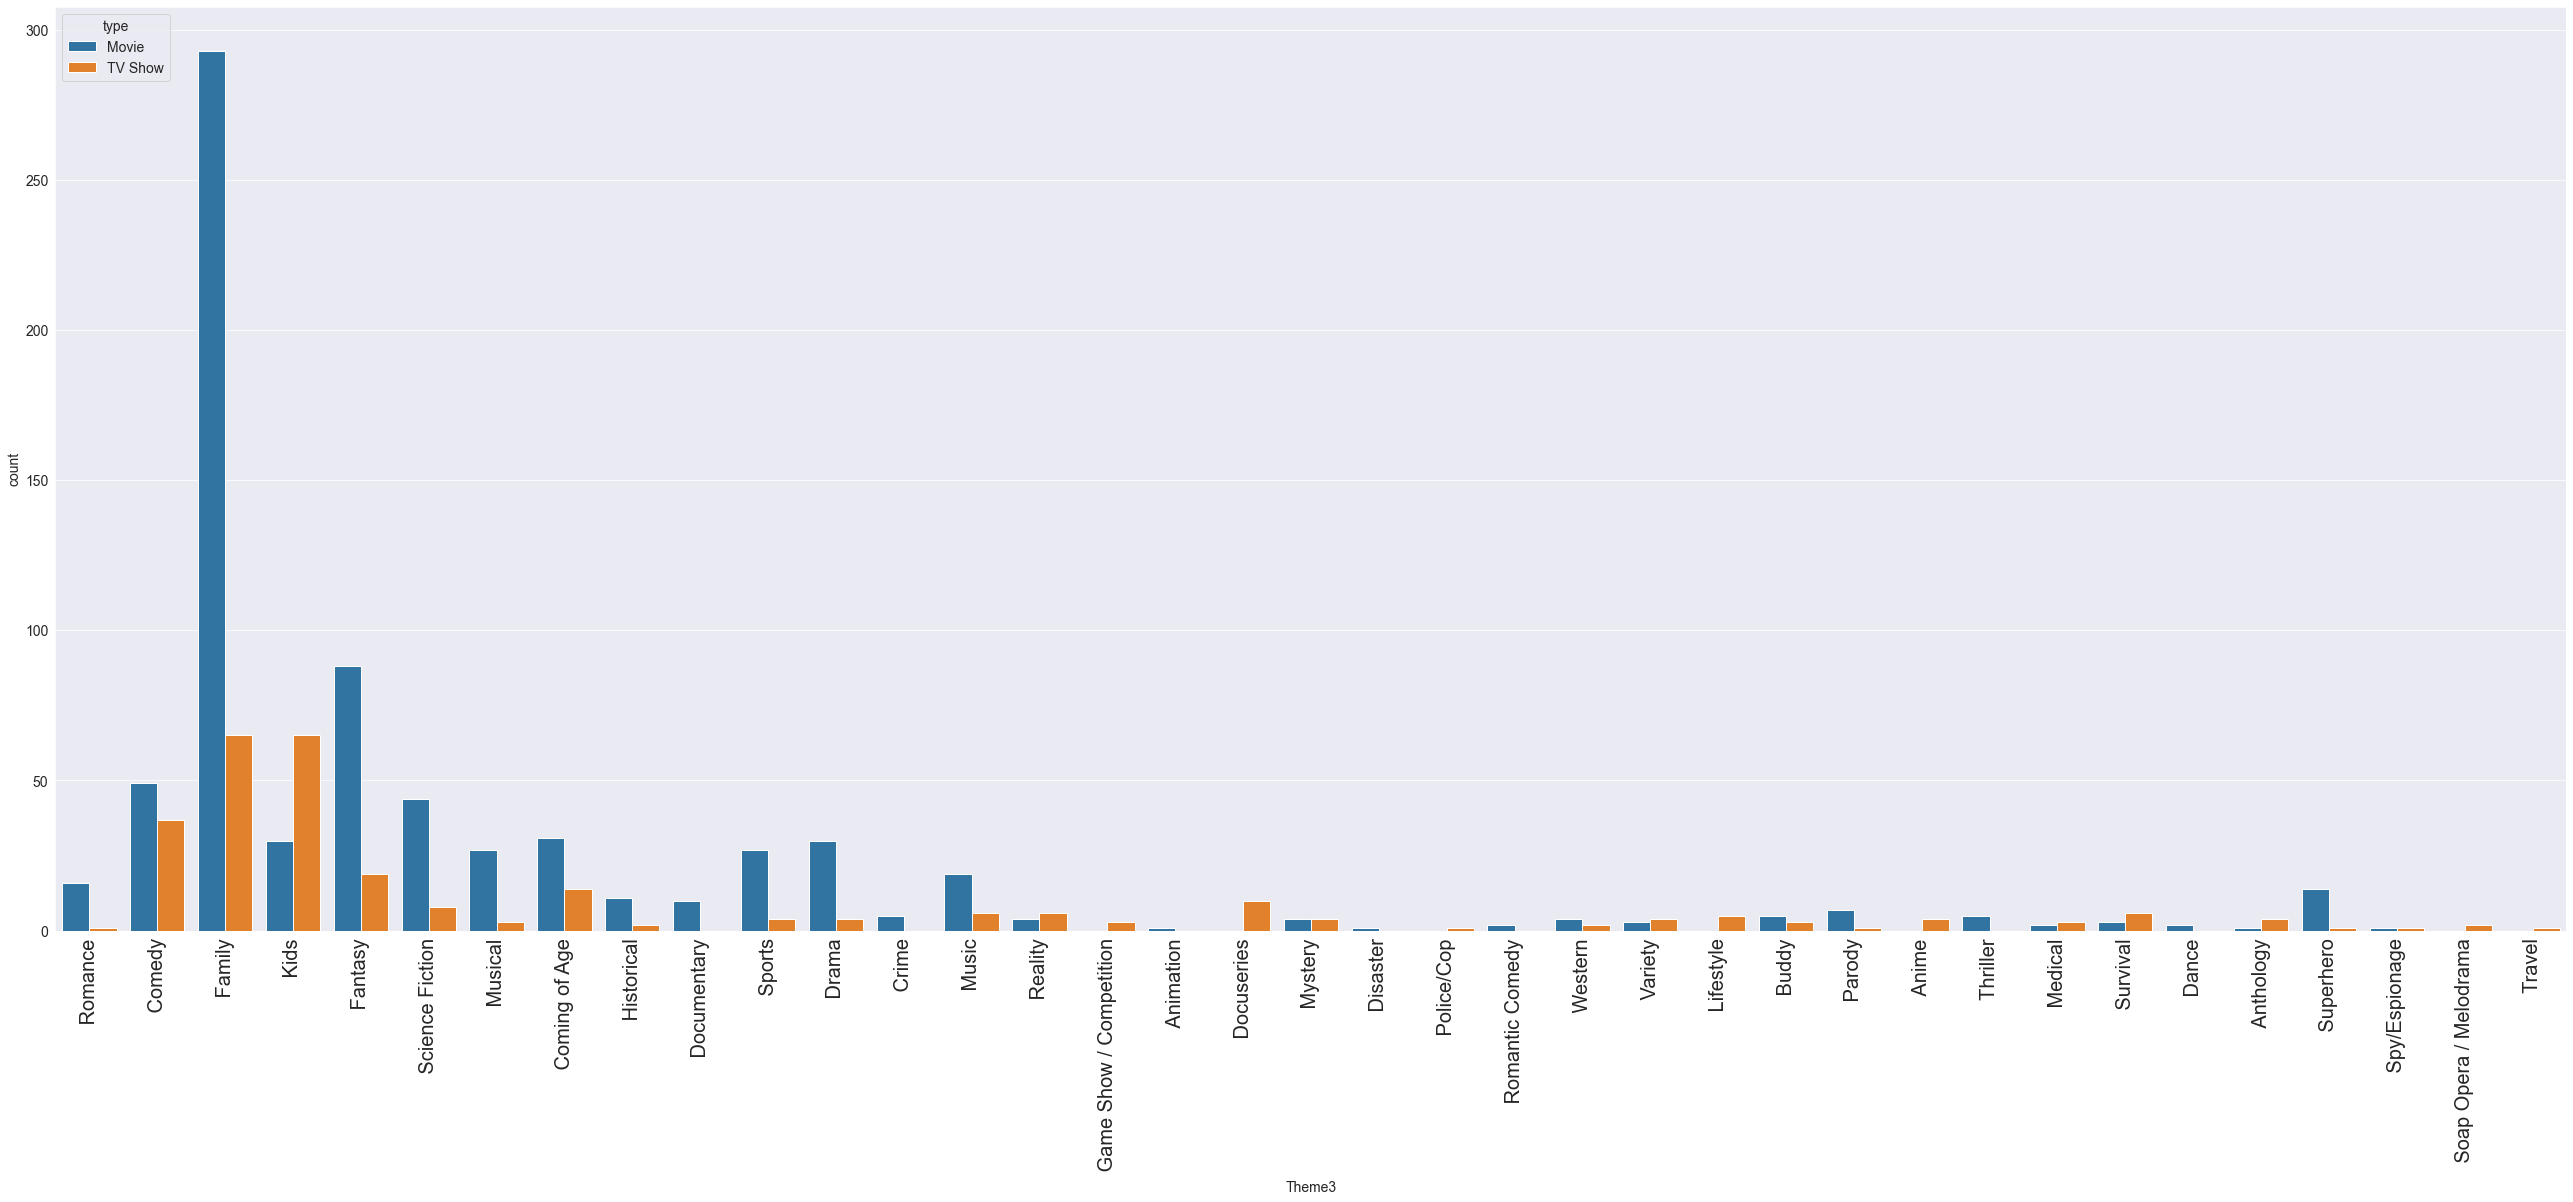

In [37]:
plt.figure(figsize=(45,17))
chart=sns.countplot(x='Theme3',hue='type', data=df2)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90,fontsize=20)

**Relation between Theme3 and type of content**

[Text(0, 0, 'Comedy'),
 Text(1, 0, 'Action-Adventure'),
 Text(2, 0, 'Animation'),
 Text(3, 0, 'Animals & Nature'),
 Text(4, 0, 'Concert Film'),
 Text(5, 0, 'Documentary'),
 Text(6, 0, 'Coming of Age'),
 Text(7, 0, 'Fantasy'),
 Text(8, 0, 'Drama'),
 Text(9, 0, 'Reality'),
 Text(10, 0, 'Docuseries'),
 Text(11, 0, 'Family'),
 Text(12, 0, 'Anthology'),
 Text(13, 0, 'Biographical'),
 Text(14, 0, 'Buddy'),
 Text(15, 0, 'Dance'),
 Text(16, 0, 'Sports'),
 Text(17, 0, 'Crime'),
 Text(18, 0, 'Game Show / Competition'),
 Text(19, 0, 'Series'),
 Text(20, 0, 'Movies'),
 Text(21, 0, 'Music'),
 Text(22, 0, 'Historical'),
 Text(23, 0, 'Musical'),
 Text(24, 0, 'Kids'),
 Text(25, 0, 'Variety'),
 Text(26, 0, 'Science Fiction'),
 Text(27, 0, 'Talk Show')]

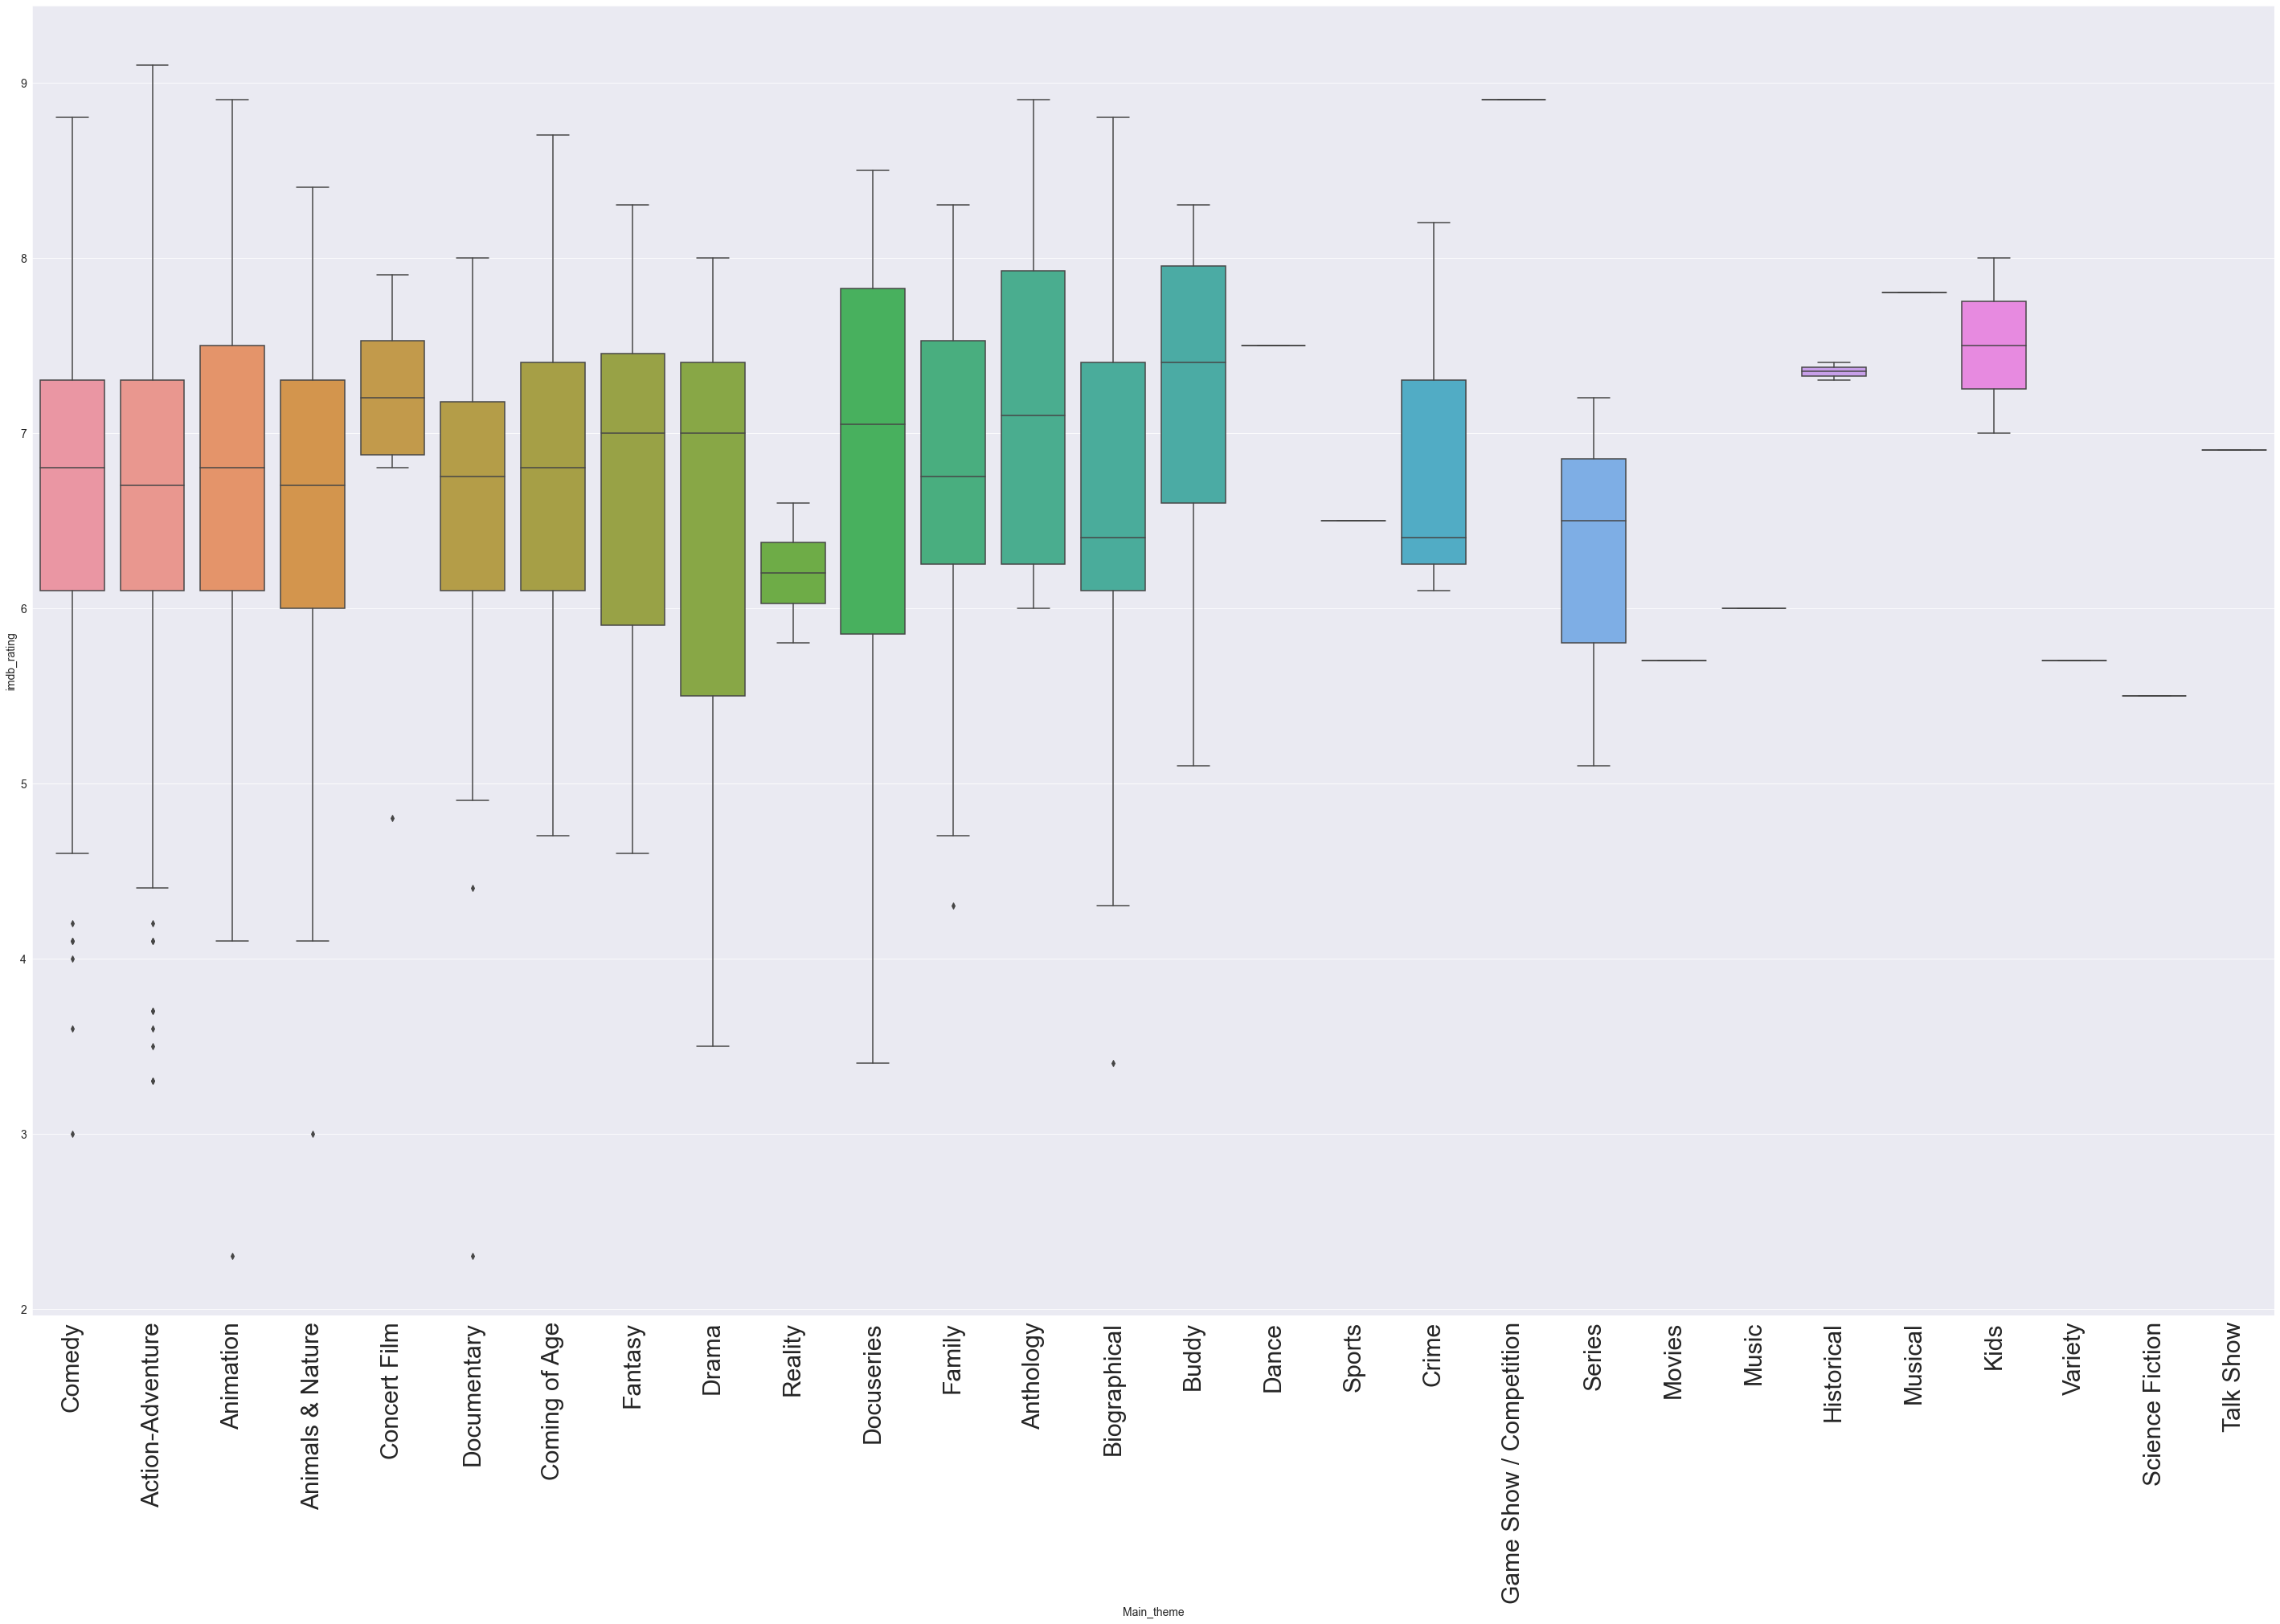

In [38]:
plt.figure(figsize=(50,30))
chart=sns.boxplot(x='Main_theme',y='imdb_rating', data=df2)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90,fontsize=30)

**Boxplot showing relation between main_theme and the corresponding imdb_ratings**

[Text(0, 0, 'Comedy'),
 Text(1, 0, 'Action-Adventure'),
 Text(2, 0, 'Animation'),
 Text(3, 0, 'Animals & Nature'),
 Text(4, 0, 'Concert Film'),
 Text(5, 0, 'Documentary'),
 Text(6, 0, 'Coming of Age'),
 Text(7, 0, 'Fantasy'),
 Text(8, 0, 'Drama'),
 Text(9, 0, 'Reality'),
 Text(10, 0, 'Docuseries'),
 Text(11, 0, 'Family'),
 Text(12, 0, 'Anthology'),
 Text(13, 0, 'Biographical'),
 Text(14, 0, 'Buddy'),
 Text(15, 0, 'Dance'),
 Text(16, 0, 'Sports'),
 Text(17, 0, 'Crime'),
 Text(18, 0, 'Game Show / Competition'),
 Text(19, 0, 'Series'),
 Text(20, 0, 'Movies'),
 Text(21, 0, 'Music'),
 Text(22, 0, 'Historical'),
 Text(23, 0, 'Musical'),
 Text(24, 0, 'Kids'),
 Text(25, 0, 'Variety'),
 Text(26, 0, 'Science Fiction'),
 Text(27, 0, 'Talk Show')]

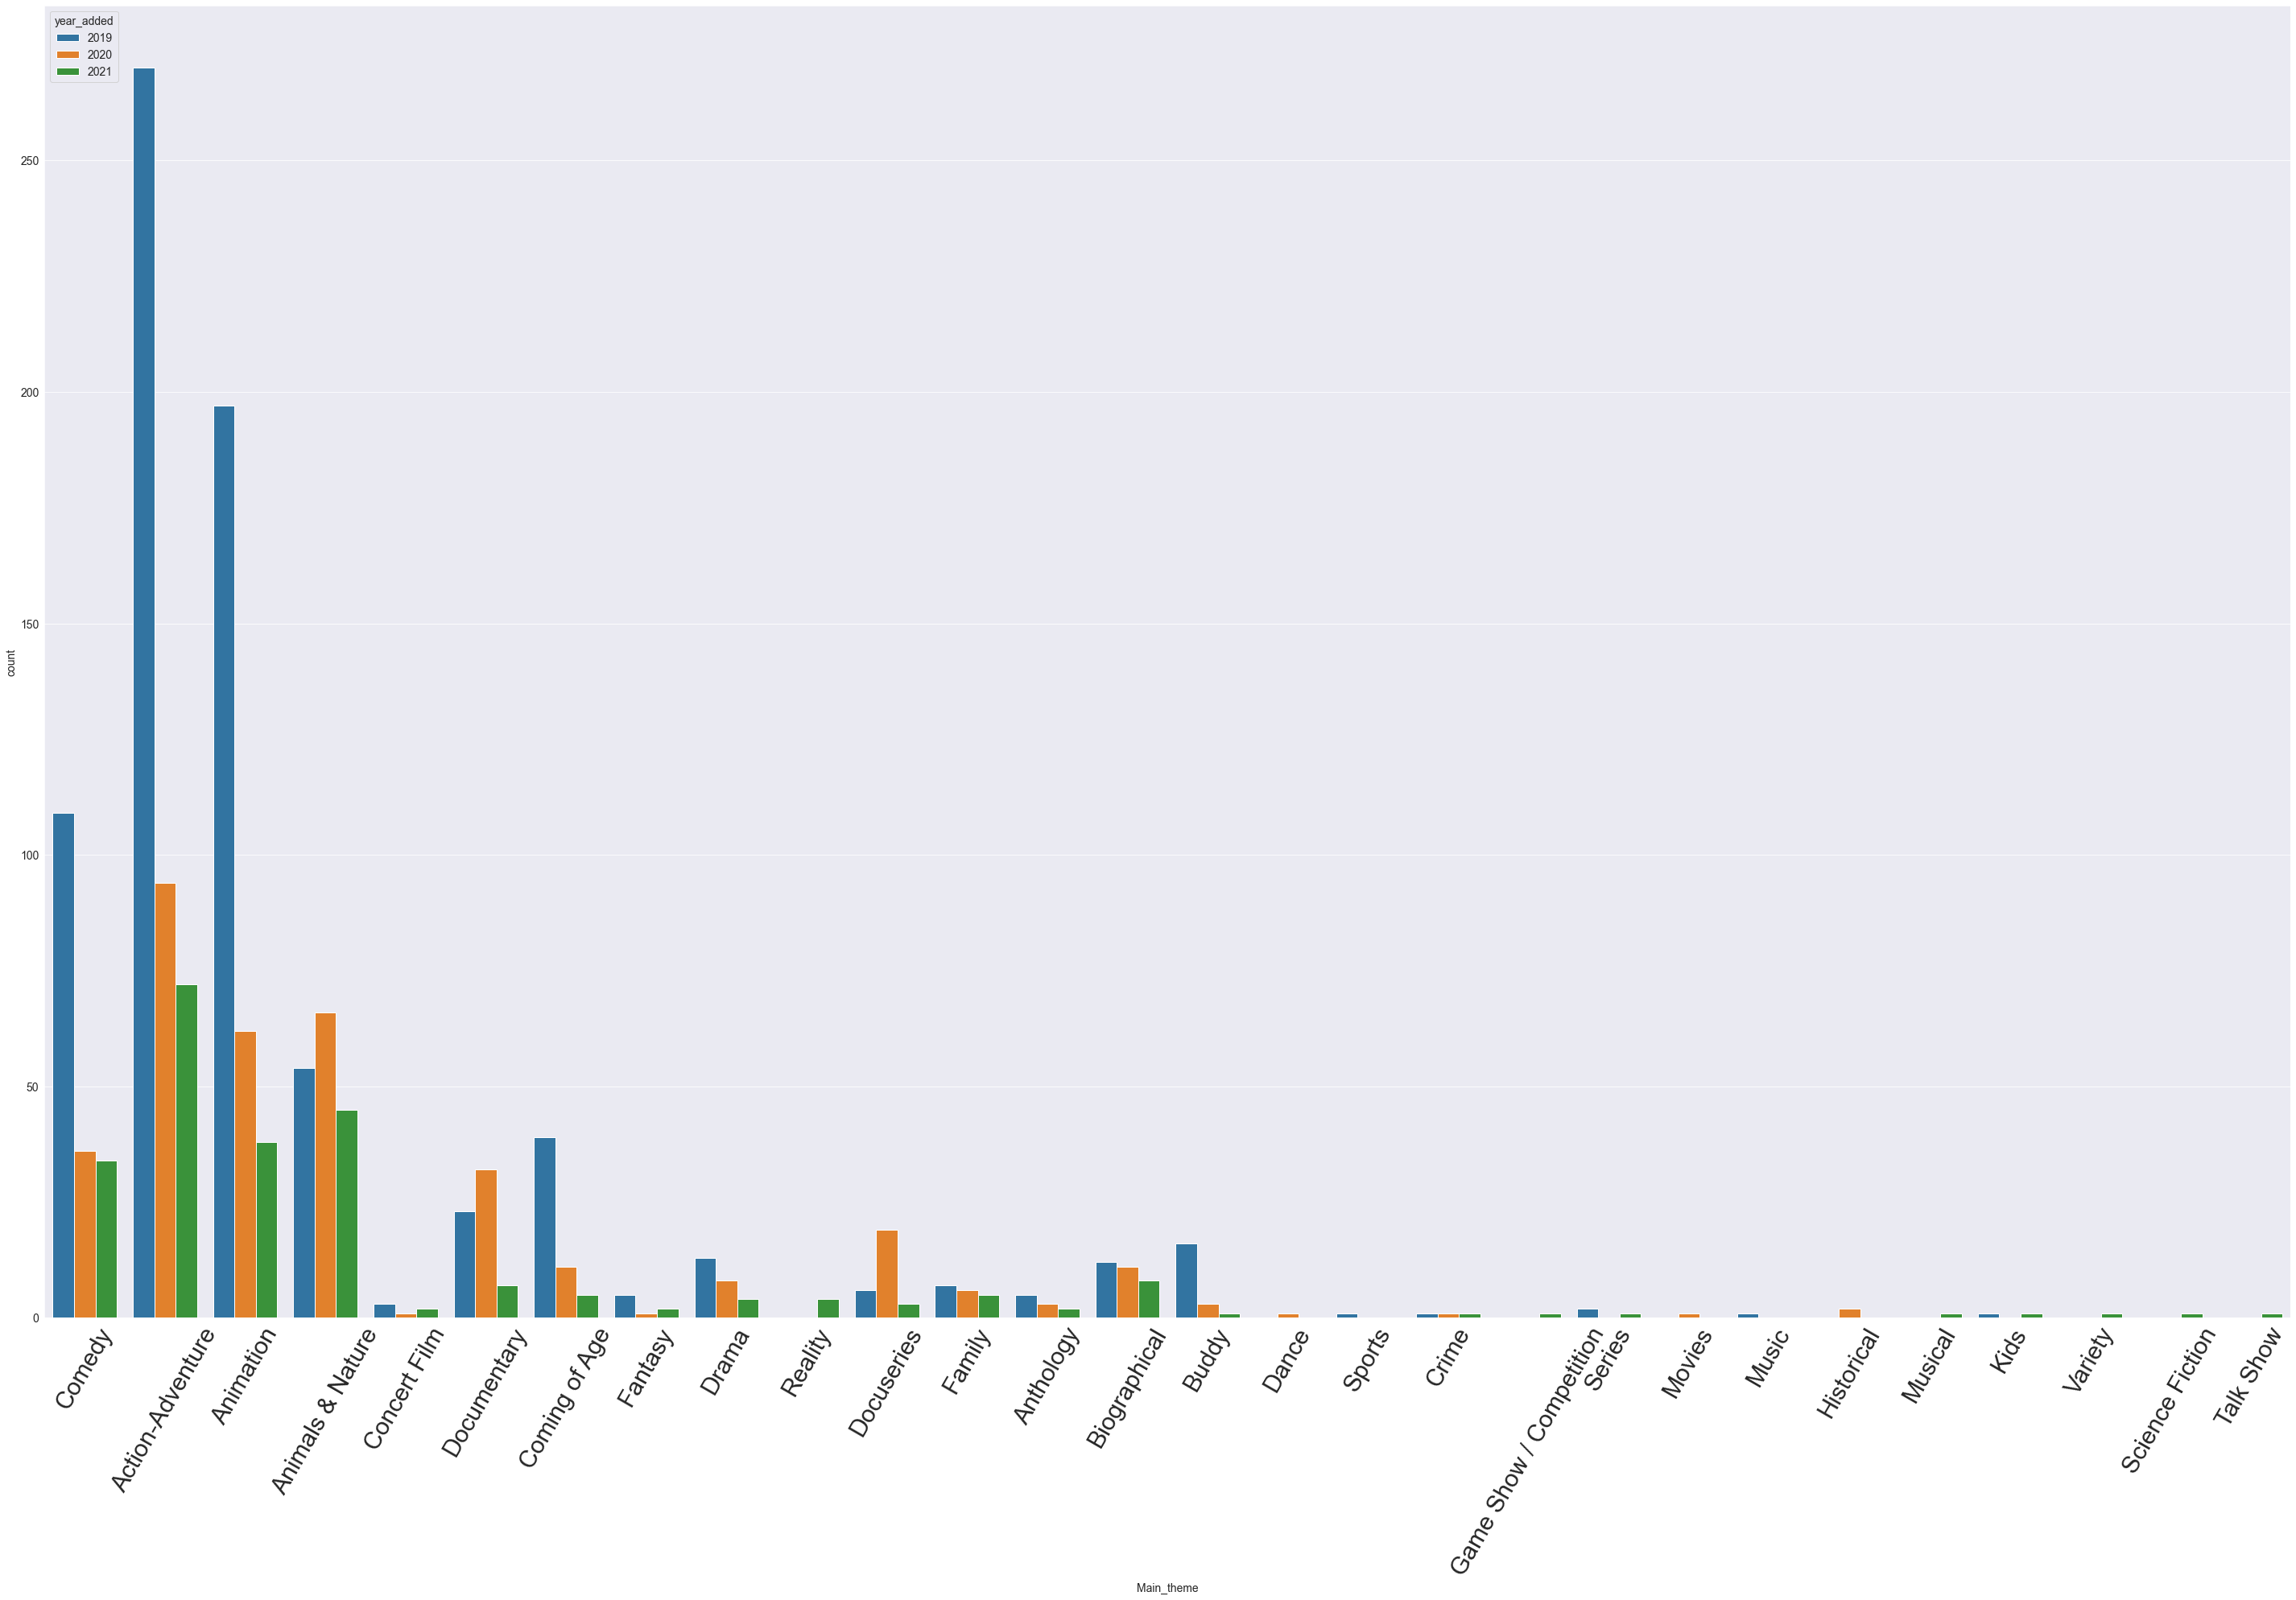

In [39]:
plt.figure(figsize=(50,30))
chart=sns.countplot(x='Main_theme',hue='year_added', data=df2)
chart.set_xticklabels(chart.get_xticklabels(),rotation=60,fontsize=30)

**Relation showing main_theme of content with respect to year_added**

_____________________________________________________________________________________________________________________________________________________________________________________

# Major Inferences: 

1) Most of the content of Disney+ is rated 'G' and 'PG' which solidifies image of Disney being a children centered platform.

2) The Movies are dominating type of content as compared to TV shows.

3) Most of the movies are rated 'G' whereas most TV shows are rated 'PG'.

4) November is the month when most of the content was added due to large number of movie additions. March is the only month when number of movies and tv shows added are equal.

5) Content with highest mean imdb_rating was added in the month of June.

6) The highest release year of Disney+ was 2020 and 2019 was the year when most of the content was added.

7) As the years are progressing more TV shows are getting released and added per year suggesting the increase in popularity of tv shows suitable for binge watching.

8) The  top 3 main themes of the contents are Action-Adventure, Animation and Comedy with Family as major theme 2.

# Conclusion:

In this project, we extracted Disney plus content data from Kaggle and requested libraries. We cleaned this raw dataset, performed some operations to make it more convenient to use and analyse. Then we analysed different relationships among content type, rating, release_year, year_added, month_added, themes and imdb rating. We found some basic insights and drew inference from the analysis and visualization.

# Created By :Shri Krishna, Pursuing M.Sc In Data Science And Analytics From School Of Data Science And Forecasting, DAVV,Indore(M.P)

________________________________________________________________________________________________________________________________